# Election Day Tweets

## Setup and import libraries

In [1]:
# Automatically reloading imported modules
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.helpers import *

pd.set_option('display.max_columns', None)

In [3]:
# Change design of plots
sns.set(style="whitegrid")

# Change sizes and resolution of plots
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 15})

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [4]:
df = pd.read_excel('data/electionday_tweets.xlsx')

## General descriptive analysis

Let's check shape of the data - number of rows and attributes:

In [5]:
df.shape

(1327, 17)

Overview of the data:

In [6]:
df.head()

is_fake_news  fake_news_category            tweet_id  \
0         False                 NaN  264033382076407808   
1         False                 NaN  265895586660757505   
2         False                 NaN  265895723445411841   
3         False                 NaN  265896172726661120   
4         False                 NaN  266042962650226688   

                       created_at  retweet_count  \
0  Thu Nov 01 15:57:18 +0000 2012           4698   
1  Tue Nov 06 19:17:02 +0000 2012           9646   
2  Tue Nov 06 19:17:35 +0000 2012           1823   
3  Tue Nov 06 19:19:22 +0000 2012           1168   
4  Wed Nov 07 05:02:39 +0000 2012           1979   

                                                text user_screen_name  \
0             @realDonaldTrump you are full of shit!      RalphGilles   
1           @realDonaldTrump you're fucking retarded        TimmyWait   
2  @realDonaldTrump You are the stupidest man on ...       mattcale52   
3  @realDonaldTrump I am continually amazed and t...     MichaelWHill   
4                  Hey @realDonaldTrump You Mad Bro?     ThePresObama   

   user_verified  user_friends_count  user_followers_count  \
0           True                 763                 26680   
1          False                 839                   397   
2          False                1184                  1353   
3          False                1603                   704   
4          False                 135                 70218   

   user_favourites_count                                       tweet_source  \
0                   3079  <a href="http://twitter.com/download/iphone" r...   
1                    504  <a href="http://twitter.com" rel="nofollow">Tw...   
2                   3355  <a href="http://twitter.com/download/iphone" r...   
3                   1479  <a href="http://twitter.com/download/iphone" r...   
4                    931  <a href="http://twitter.com" rel="nofollow">Tw...   

   geo_coordinates  num_hashtags  num_mentions  num_urls  num_media  
0                0             0             2         0          0  
1                0             0             2         0          0  
2                0             0             2         0          0  
3                0             0             2         0          0  
4                0             0             2         0          0

### Datatypes

**Note:** Be careful, attributes with only NaN values are considered as `float64` type by default.

In [7]:
df.dtypes

is_fake_news                bool
fake_news_category       float64
tweet_id                   int64
created_at                object
retweet_count              int64
text                      object
user_screen_name          object
user_verified               bool
user_friends_count         int64
user_followers_count       int64
user_favourites_count      int64
tweet_source              object
geo_coordinates            int64
num_hashtags               int64
num_mentions               int64
num_urls                   int64
num_media                  int64
dtype: object

### Basic characteristics

In [8]:
df.describe()

fake_news_category      tweet_id  retweet_count  user_friends_count  \
count          136.000000  1.327000e+03    1327.000000         1327.000000   
mean             2.117647  7.788172e+17    3633.334589         8983.629992   
std              1.633260  5.602454e+16    5305.272308        33033.454741   
min              1.000000  2.640334e+17    1002.000000            0.000000   
25%              1.000000  7.888427e+17    1370.000000          254.500000   
50%              1.000000  7.950101e+17    2090.000000          779.000000   
75%              4.000000  7.959941e+17    3732.000000         3326.000000   
max              5.000000  7.961288e+17   79092.000000       578811.000000   

       user_followers_count  user_favourites_count  geo_coordinates  \
count          1.327000e+03            1327.000000      1327.000000   
mean           3.509883e+06           11723.996232         0.835720   
std            1.181786e+07           28691.640919         1.180596   
min            1.600000e+01               0.000000         0.000000   
25%            3.186200e+04             215.000000         0.000000   
50%            1.948300e+05            1563.000000         0.000000   
75%            9.265215e+05            7190.000000         1.000000   
max            9.393653e+07          335194.000000         9.000000   

       num_hashtags  num_mentions     num_urls    num_media  
count   1327.000000   1327.000000  1327.000000  1327.000000  
mean       0.835720      1.945742     0.411454     0.232102  
std        1.180596      1.021671     0.516212     0.422333  
min        0.000000      1.000000     0.000000     0.000000  
25%        0.000000      1.000000     0.000000     0.000000  
50%        0.000000      2.000000     0.000000     0.000000  
75%        1.000000      2.000000     1.000000     0.000000  
max        9.000000     11.000000     2.000000     1.000000

In [9]:
df.describe(exclude=[np.number])

is_fake_news                      created_at  \
count          1327                            1327   
unique            2                            1327   
top           False  Tue Nov 08 13:47:25 +0000 2016   
freq           1191                               1   

                                                     text user_screen_name  \
count                                                1327             1327   
unique                                               1326              643   
top     Absolutely incredible! This is the @realDonald...          FoxNews   
freq                                                    2               48   

       user_verified                                       tweet_source  
count           1327                                               1327  
unique             2                                                 34  
top             True  <a href="http://twitter.com/download/iphone" r...  
freq             788                                                521

### One-value columns

Which attributes contain only one value?

In [10]:
one_value_attributes_analysis(df)

### Missing values

Analysis of missing values in attributes:

fake_news_category: 1191 (89.75%)

Missing values plot (inverse logic, plot is showing how many values are not NaN):


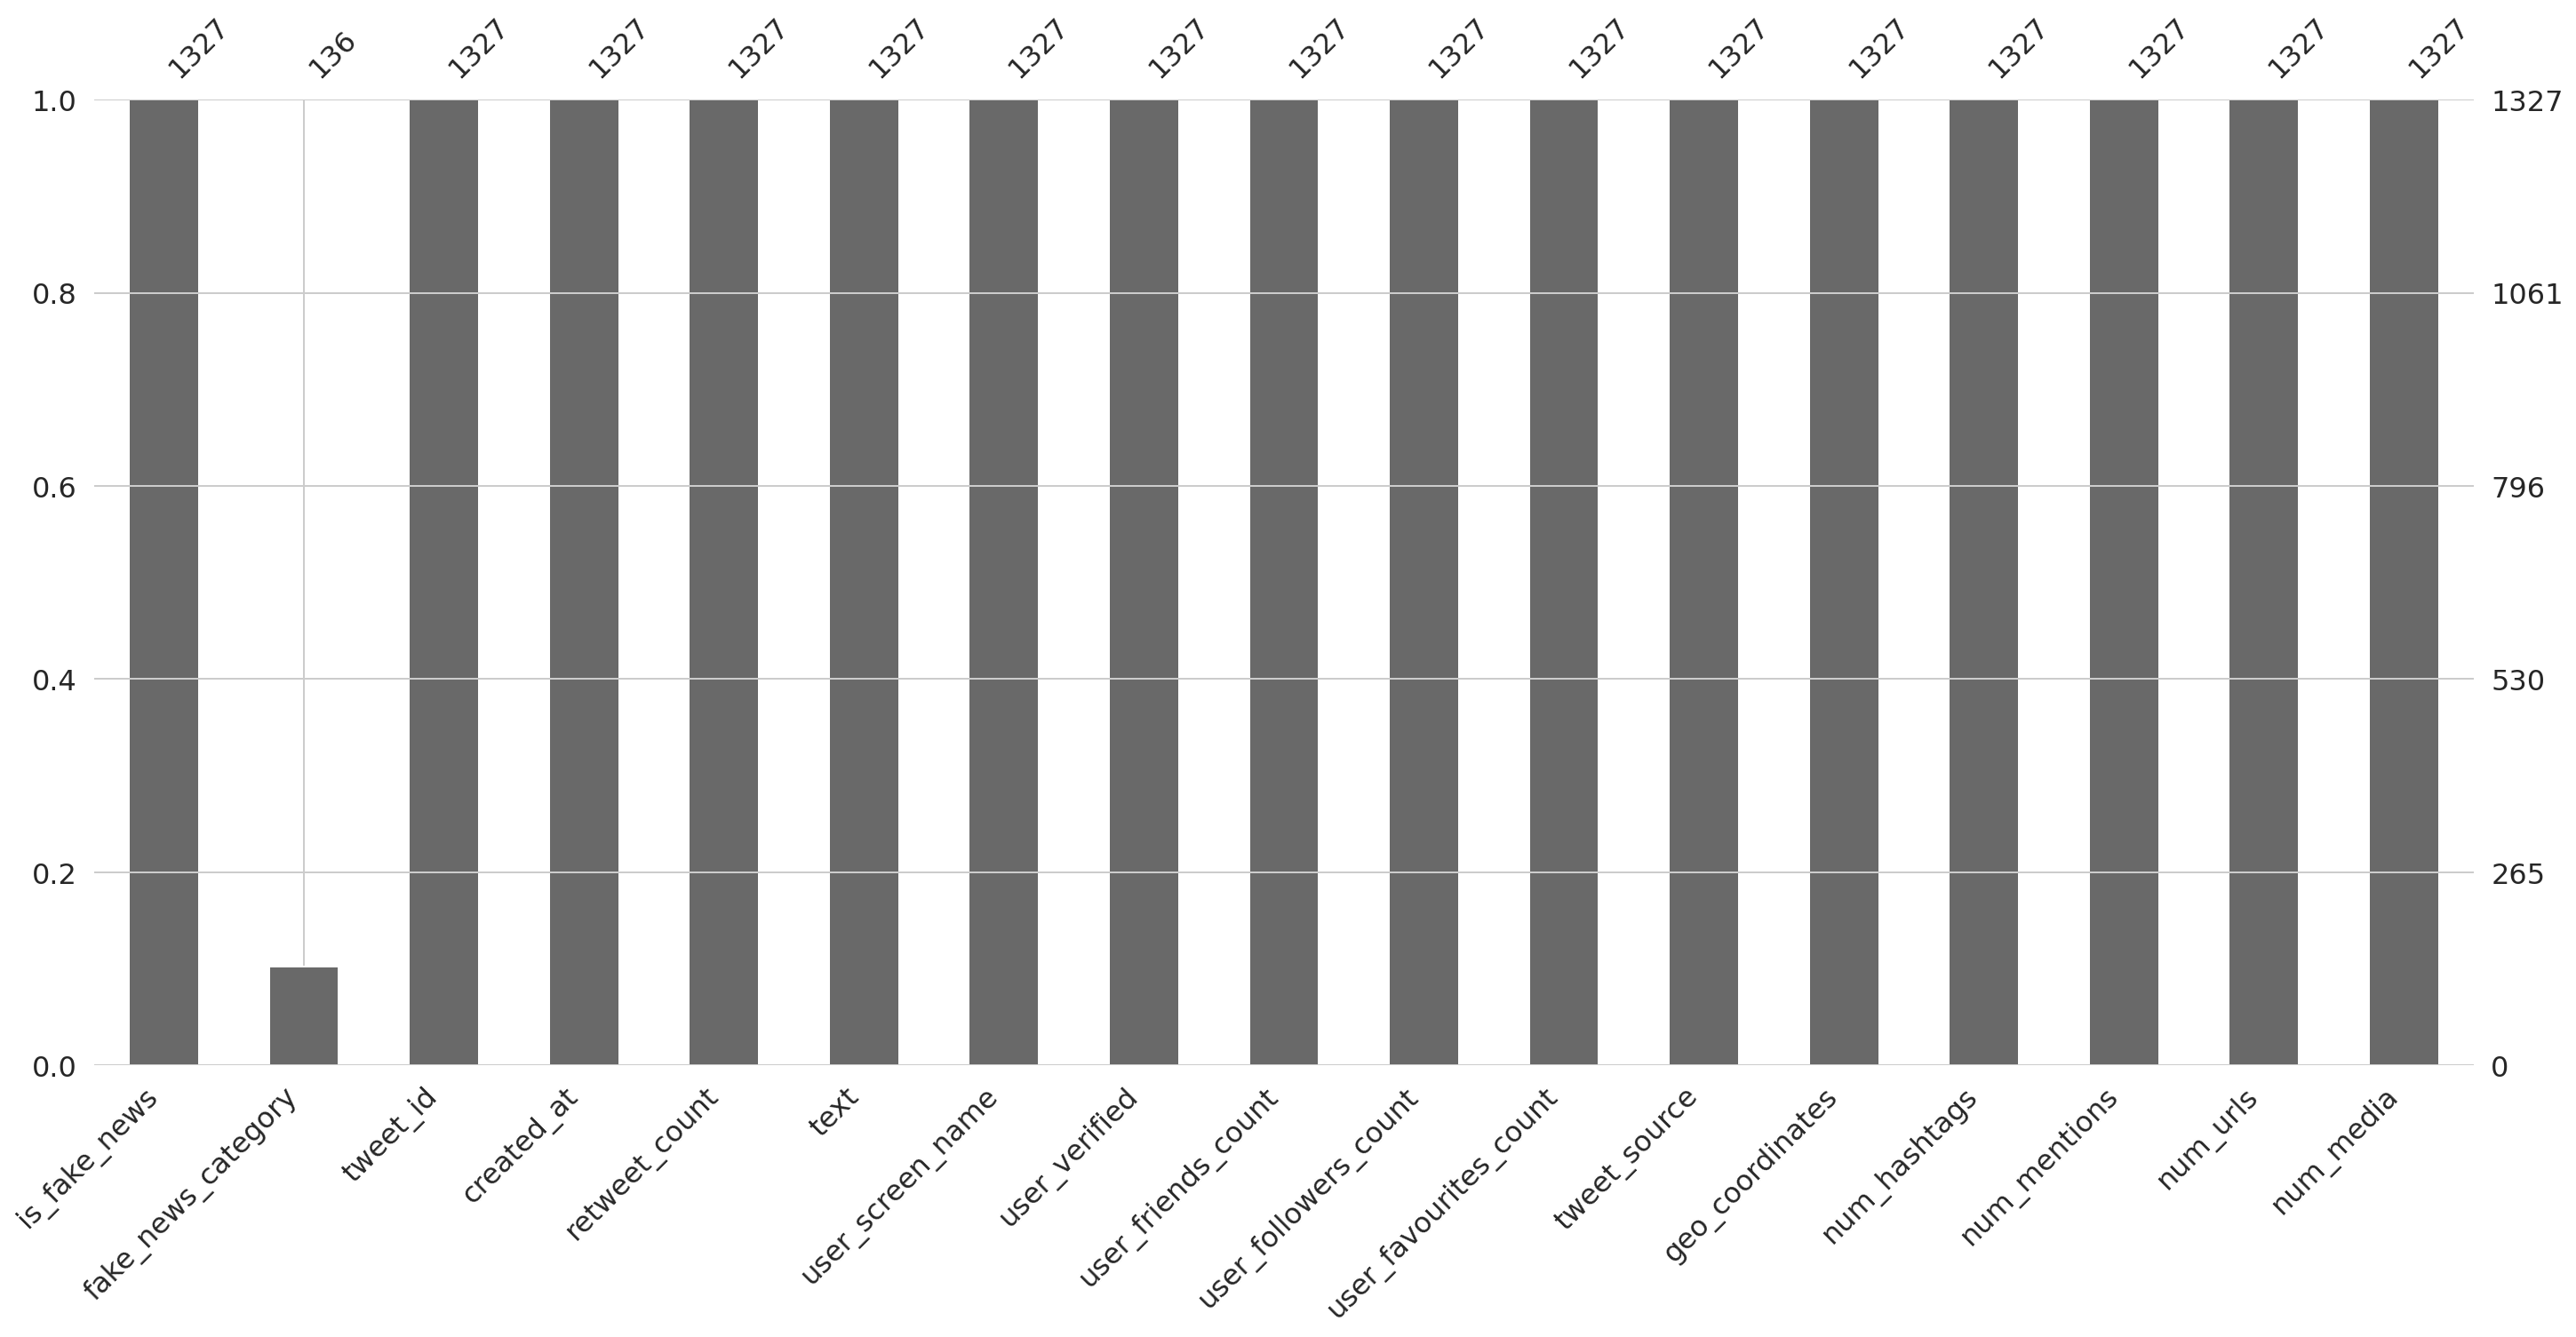

In [11]:
missing_values_analysis(df)

### Duplicates

Are there any duplicates?

In [12]:
df.duplicated().any()

False

## Attributes analysis

Analysis of all attributes:

In [13]:
skip_attributes = [
    'tweet_id', 'created_at', 'geo_coordinates'
] # attributes to skip in analysis (e.g. id)

textual_attributes = [
    'text', 'user_screen_name', 'tweet_source'
] # attributes with text values (e.g. content of article)
textual_attributes = list(filter(lambda value: value not in skip_attributes, textual_attributes))

numerical_attributes = list(df.select_dtypes([np.number]).columns)
numerical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes + ['fake_news_category'], numerical_attributes))

categorical_attributes = list(df.select_dtypes(['object', 'category', 'bool']).columns)
categorical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, categorical_attributes))
categorical_attributes.append('fake_news_category')

label_column = 'is_fake_news' # attribute considered as "label"

### Label attribute distribution

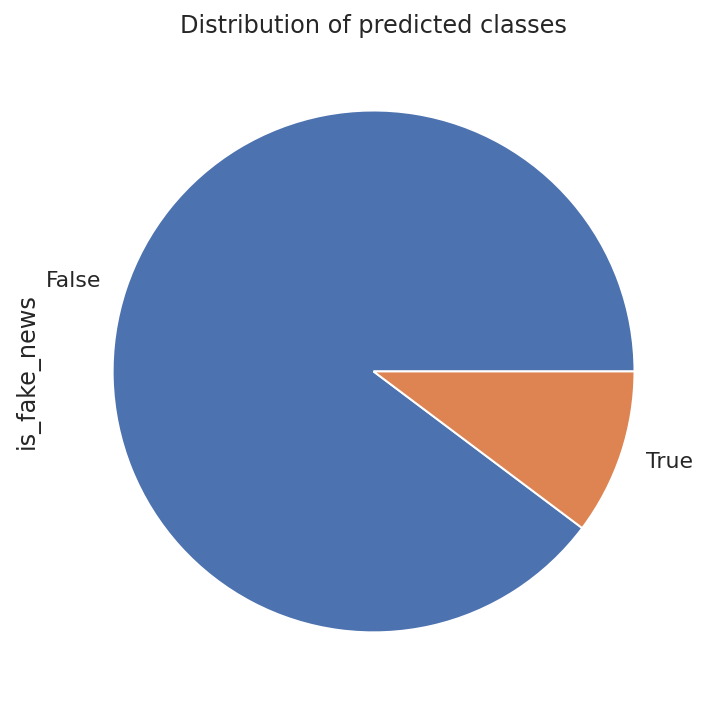

In [14]:
df[label_column].value_counts().plot(kind='pie', title='Distribution of predicted classes');

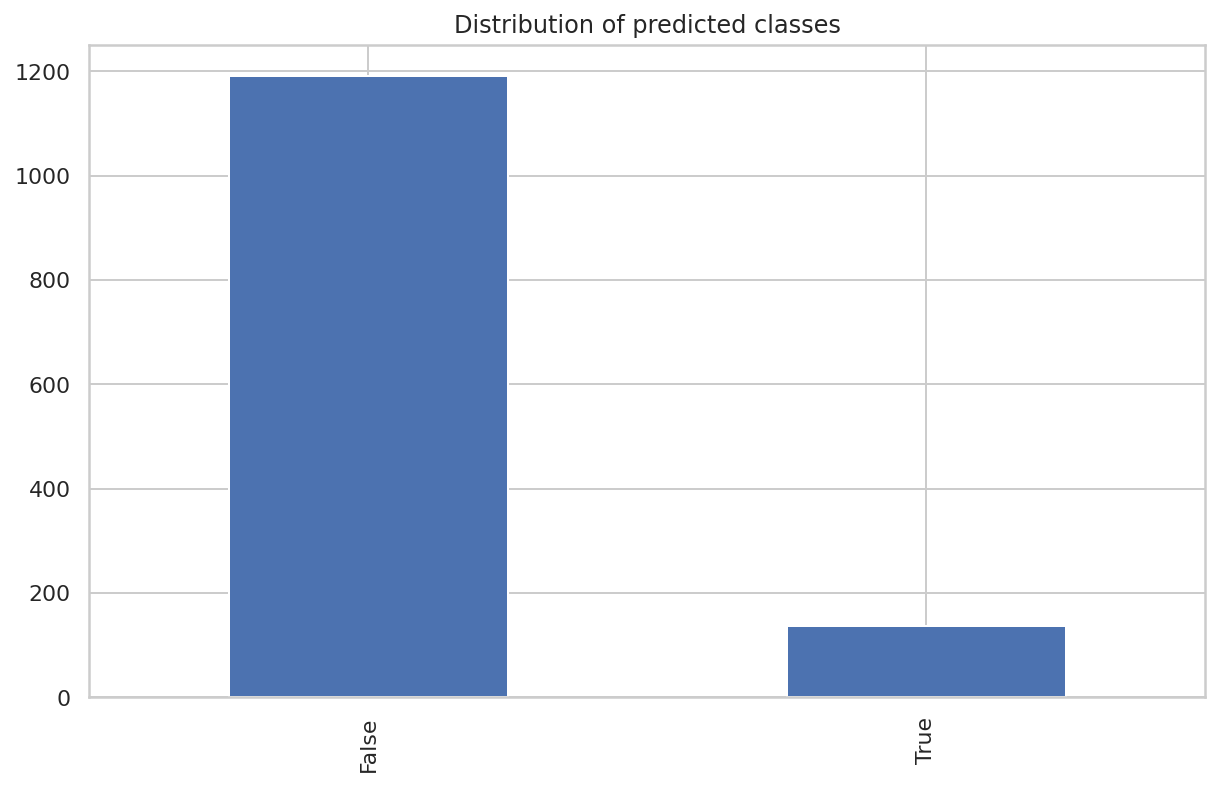

In [15]:
df[label_column].value_counts().plot(kind='bar', title='Distribution of predicted classes');

### Numerical attributes

Analysis of numerical attributes:



Analysis of attribute "retweet_count"


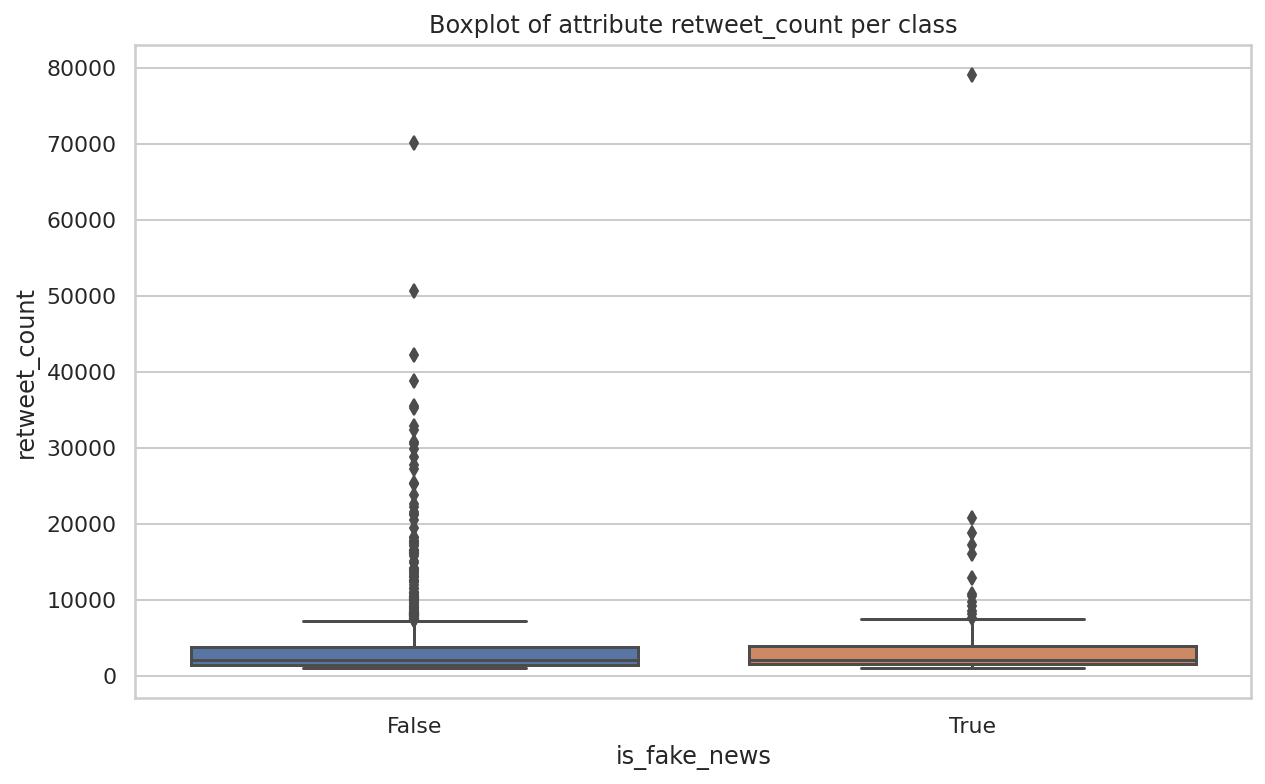

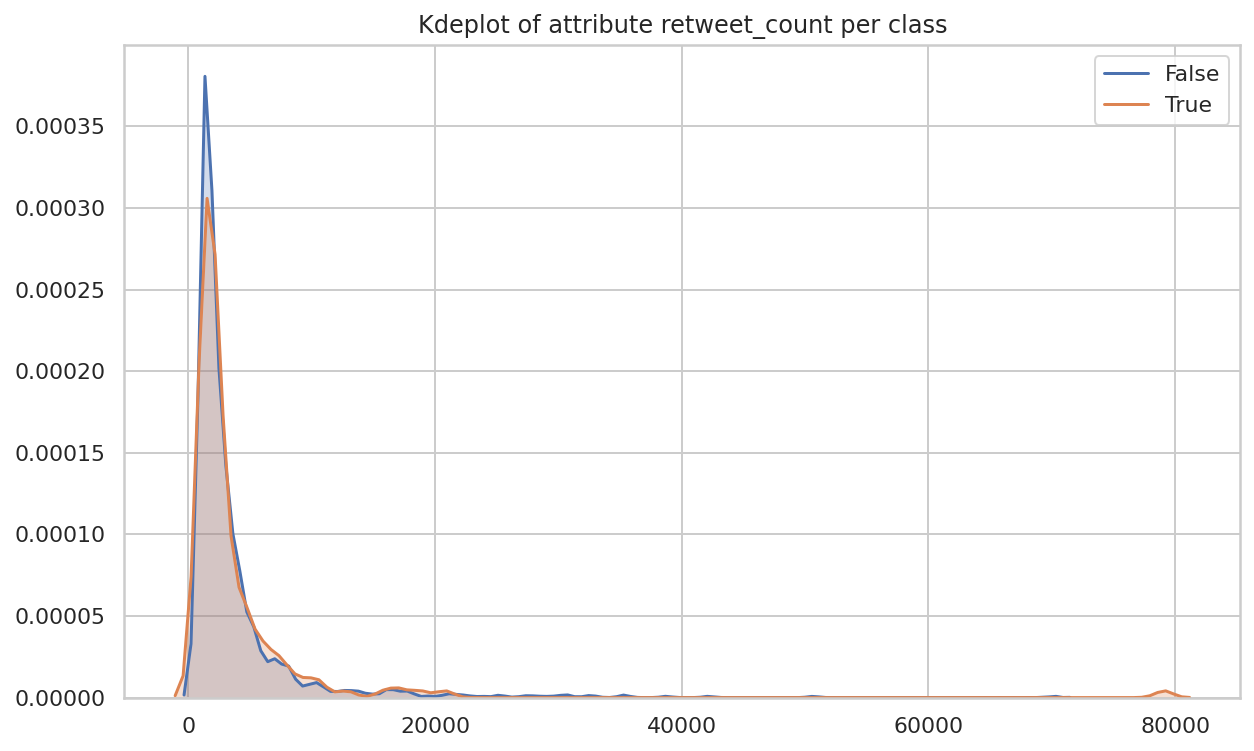



Analysis of attribute "user_friends_count"


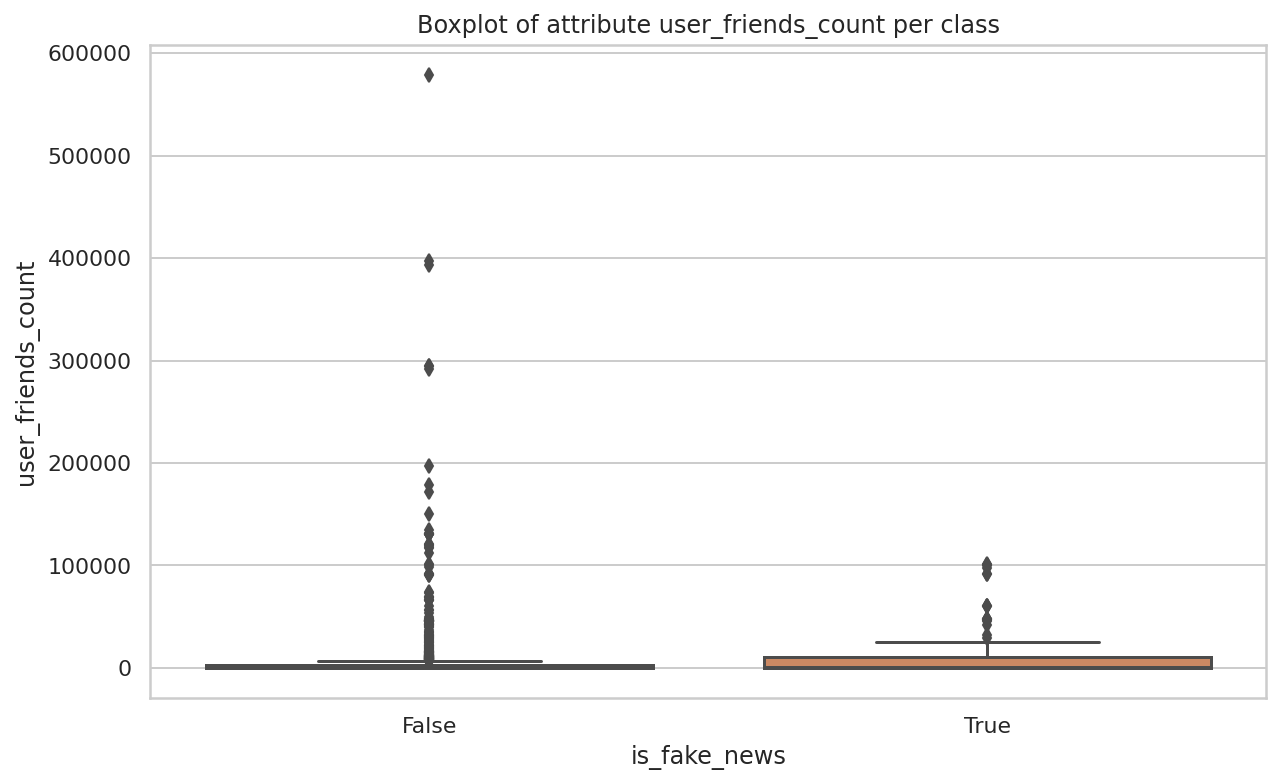

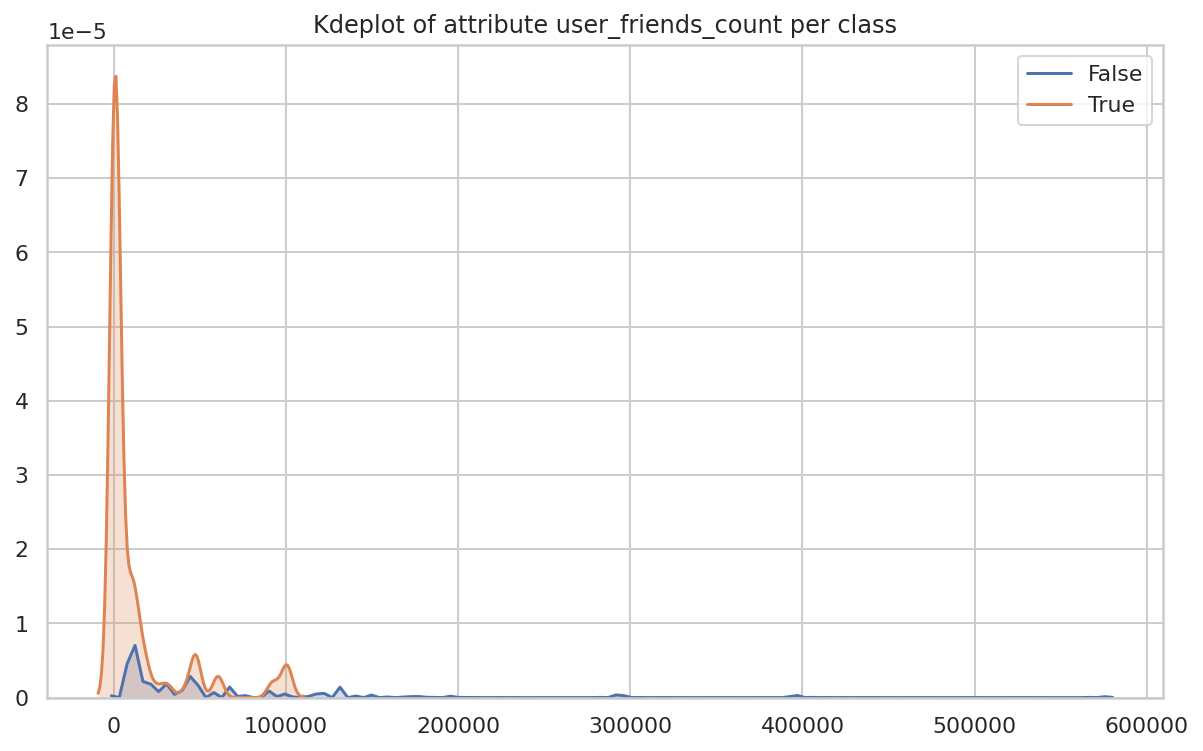



Analysis of attribute "user_followers_count"


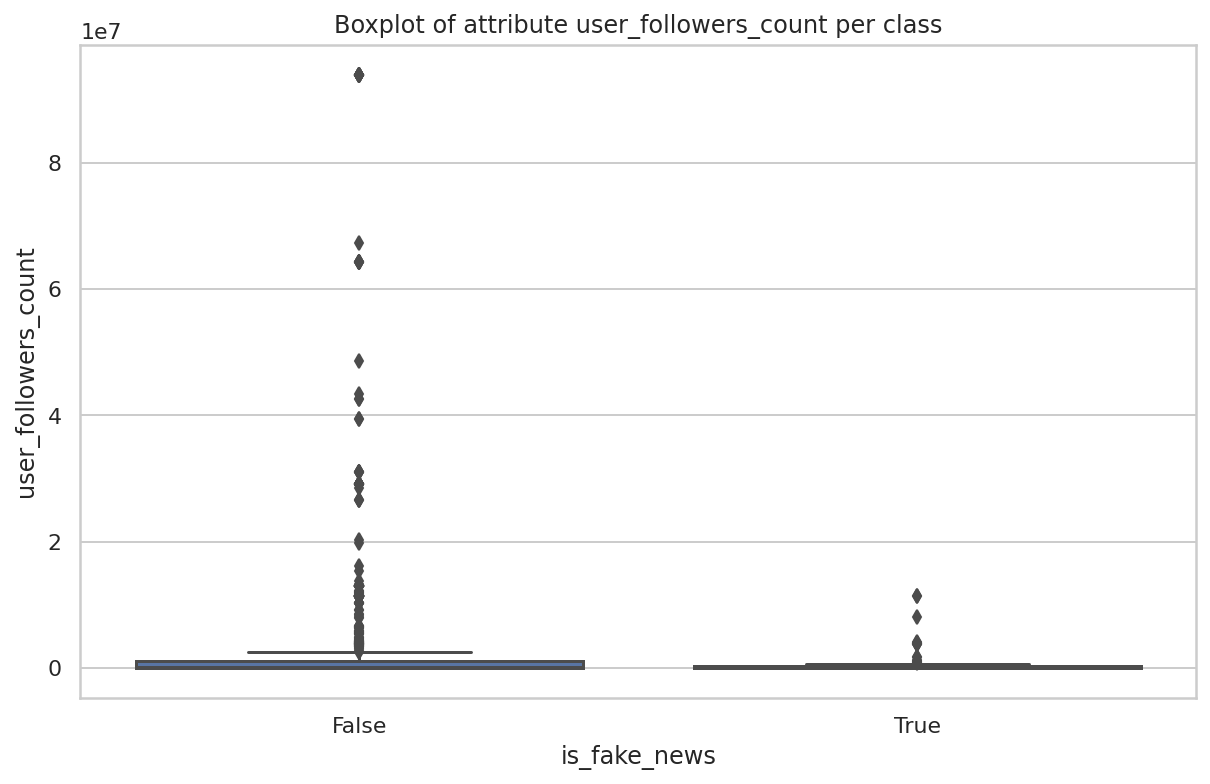

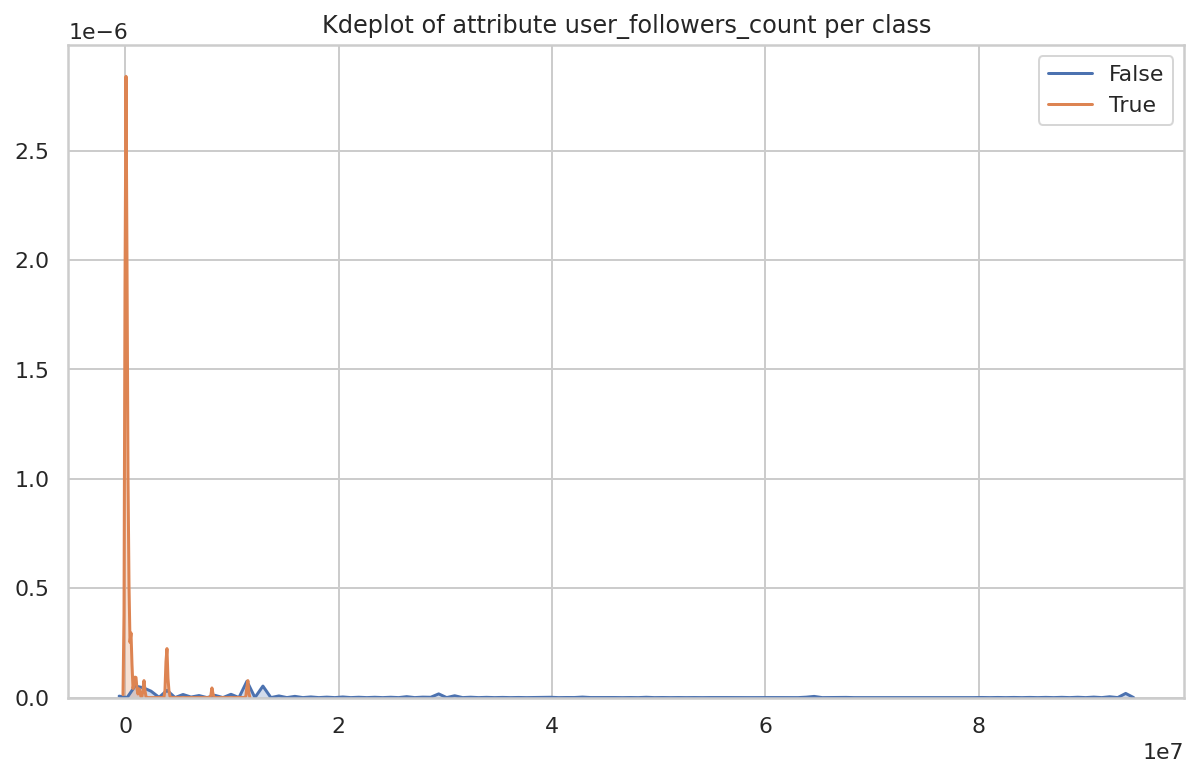



Analysis of attribute "user_favourites_count"


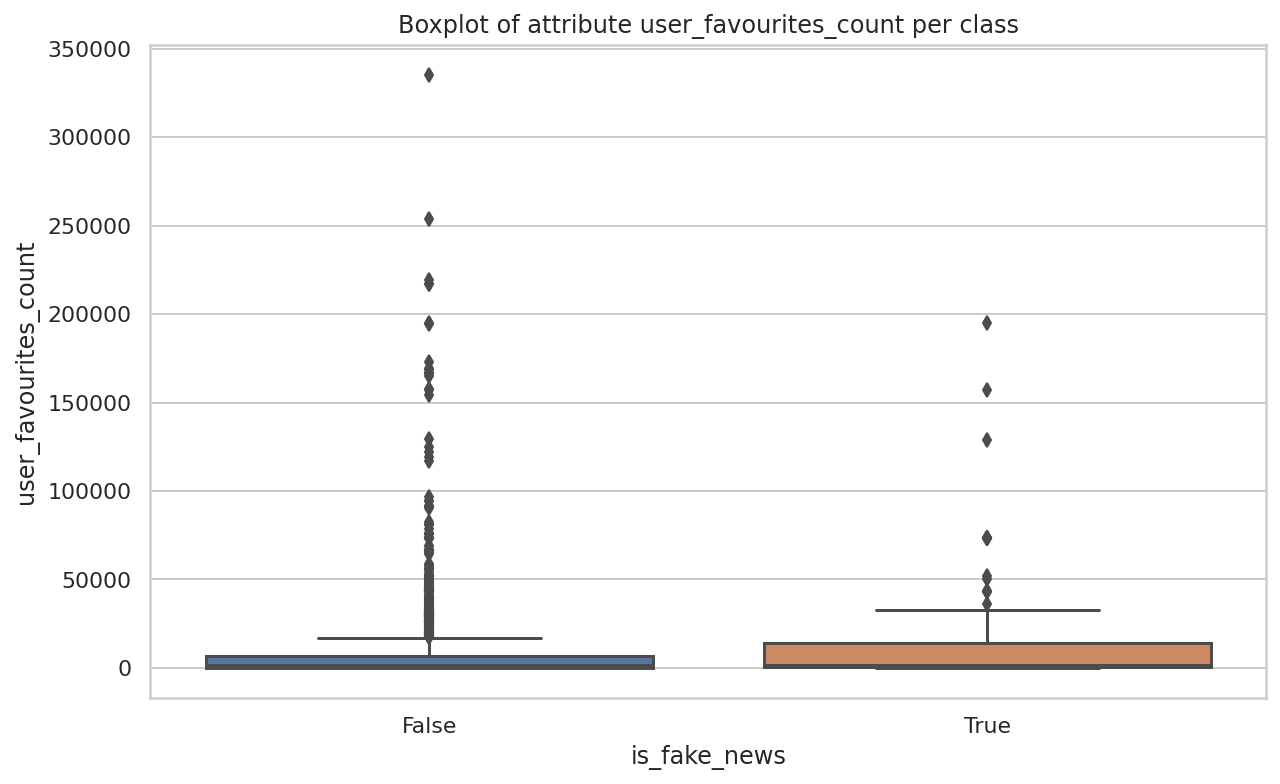

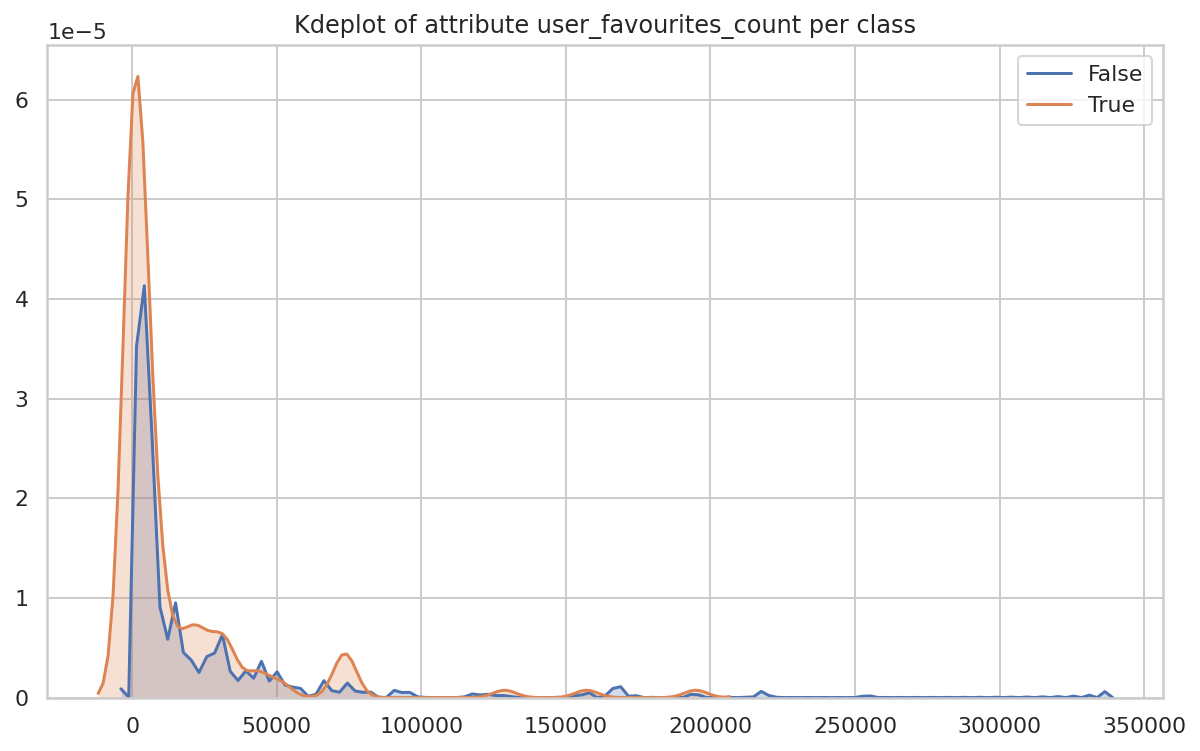



Analysis of attribute "num_hashtags"


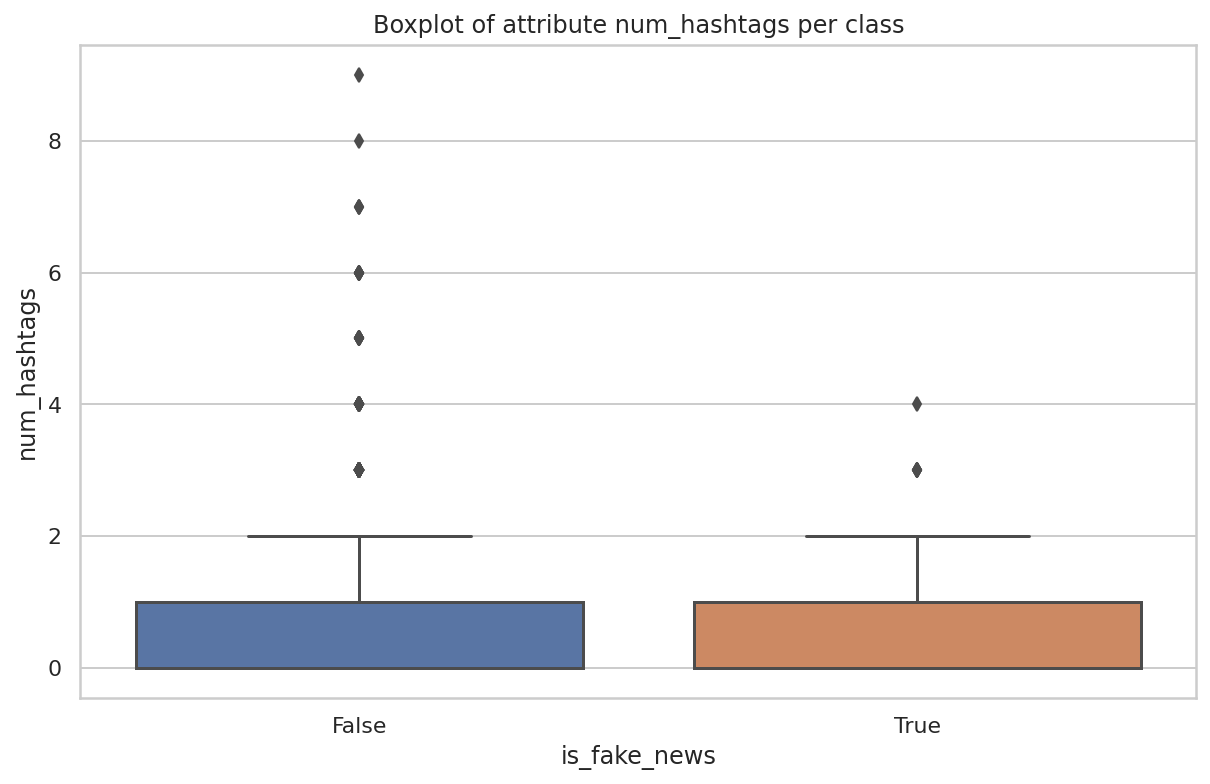

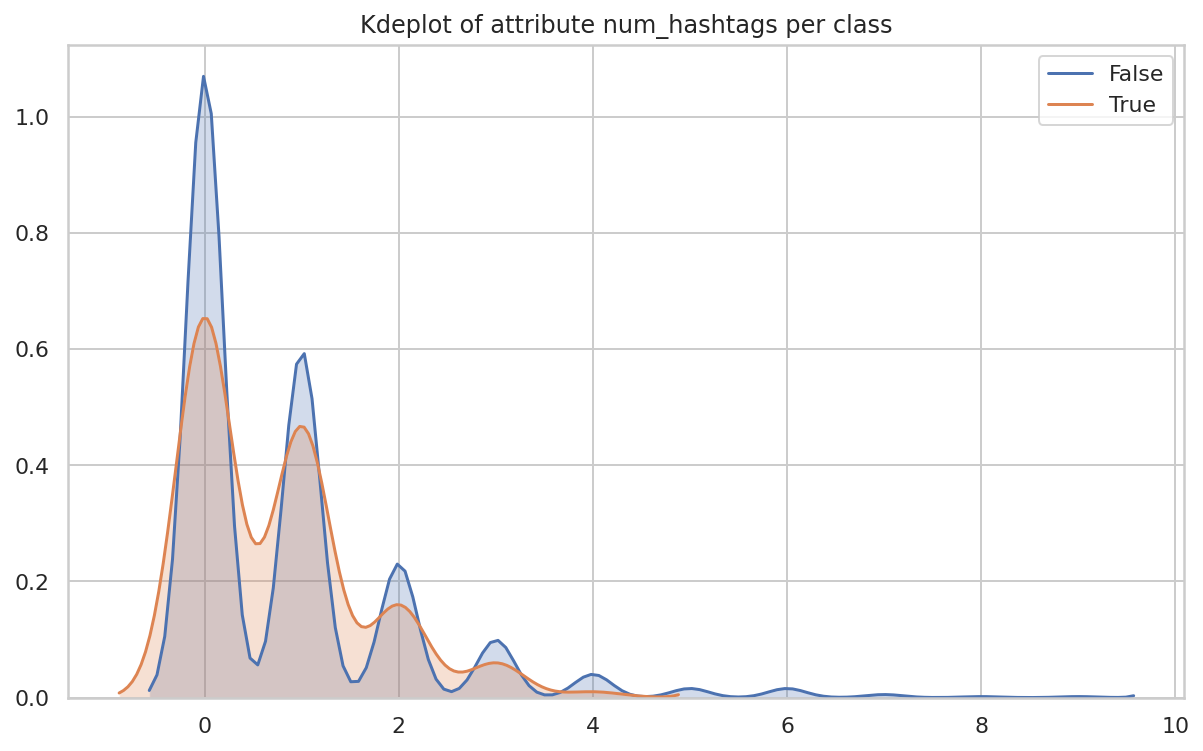



Analysis of attribute "num_mentions"


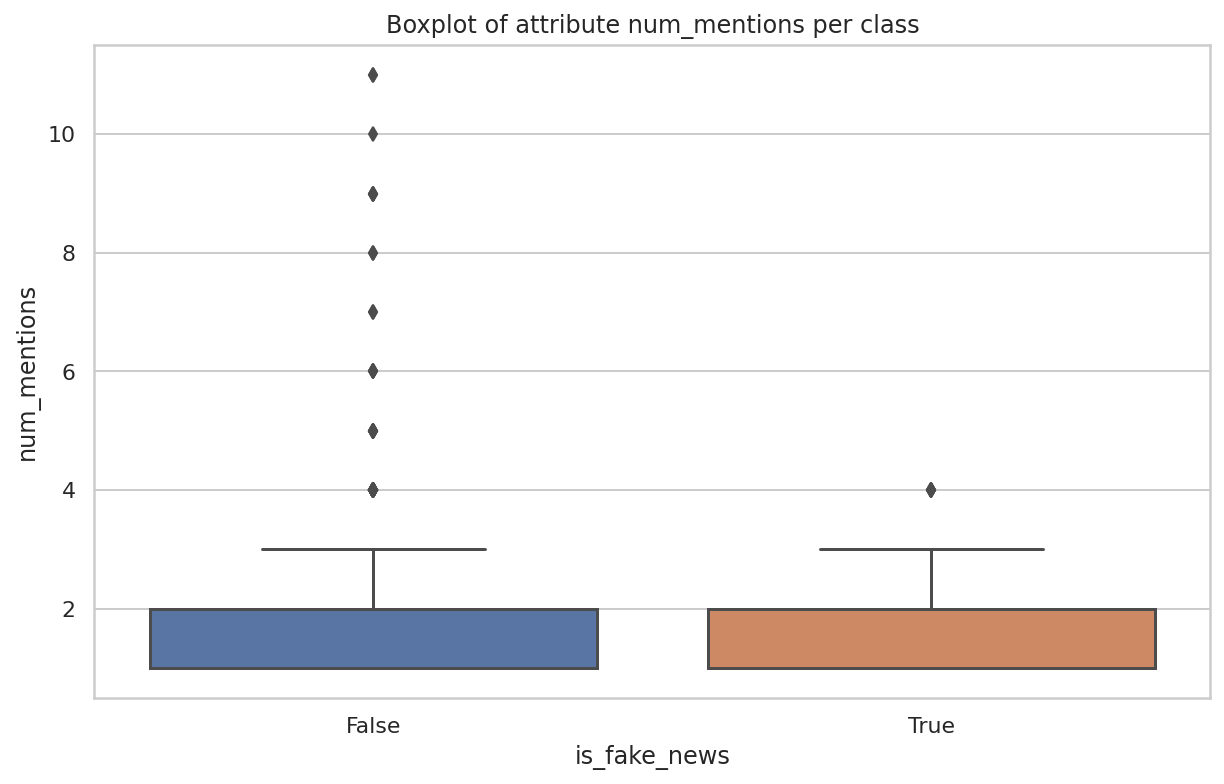

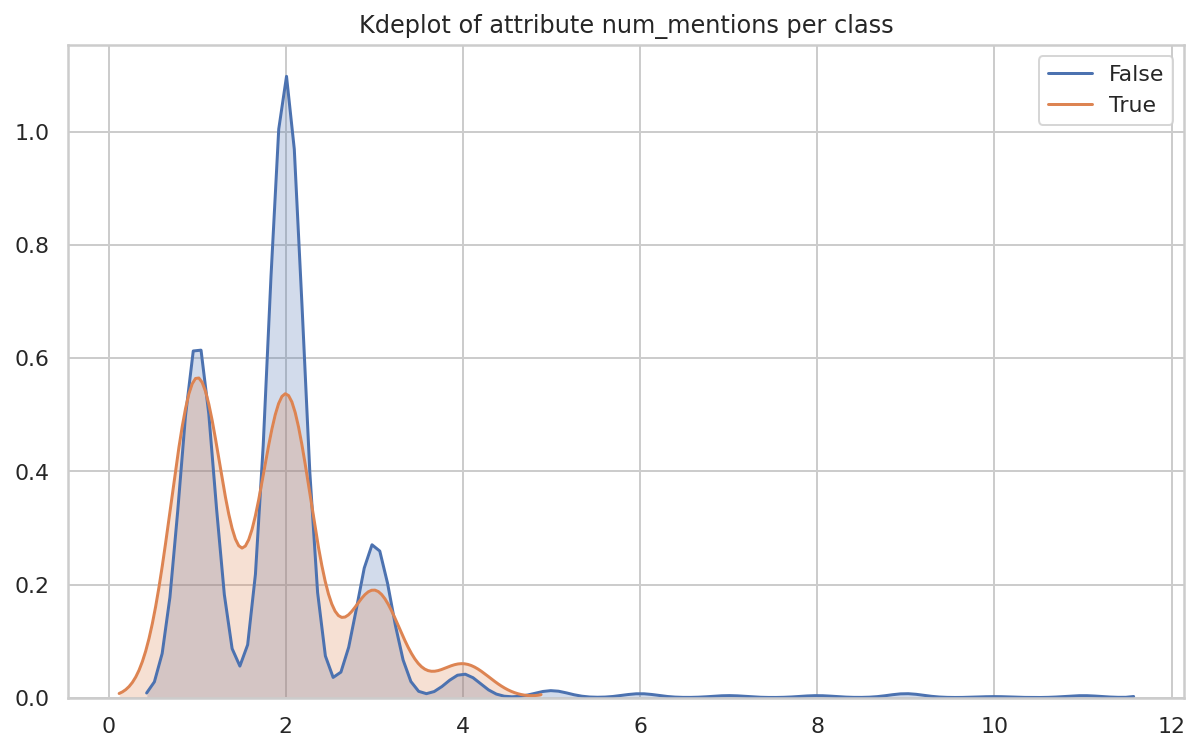



Analysis of attribute "num_urls"


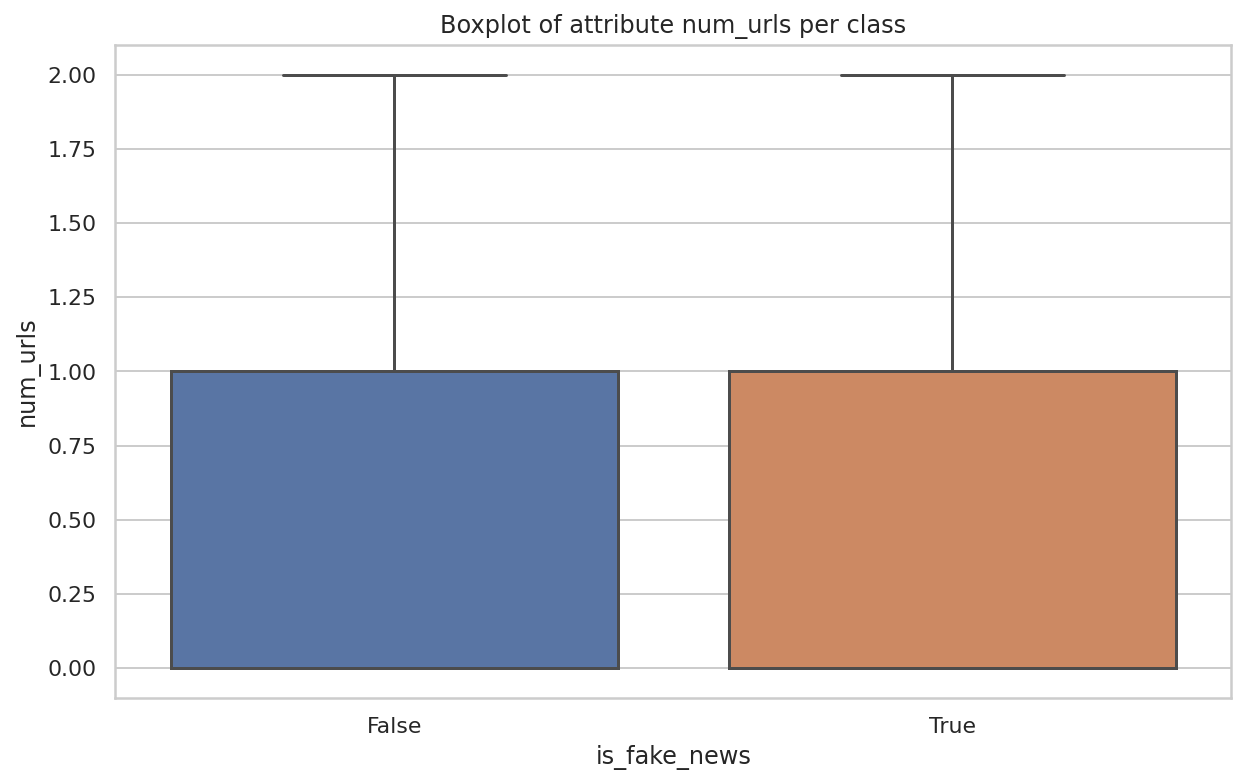

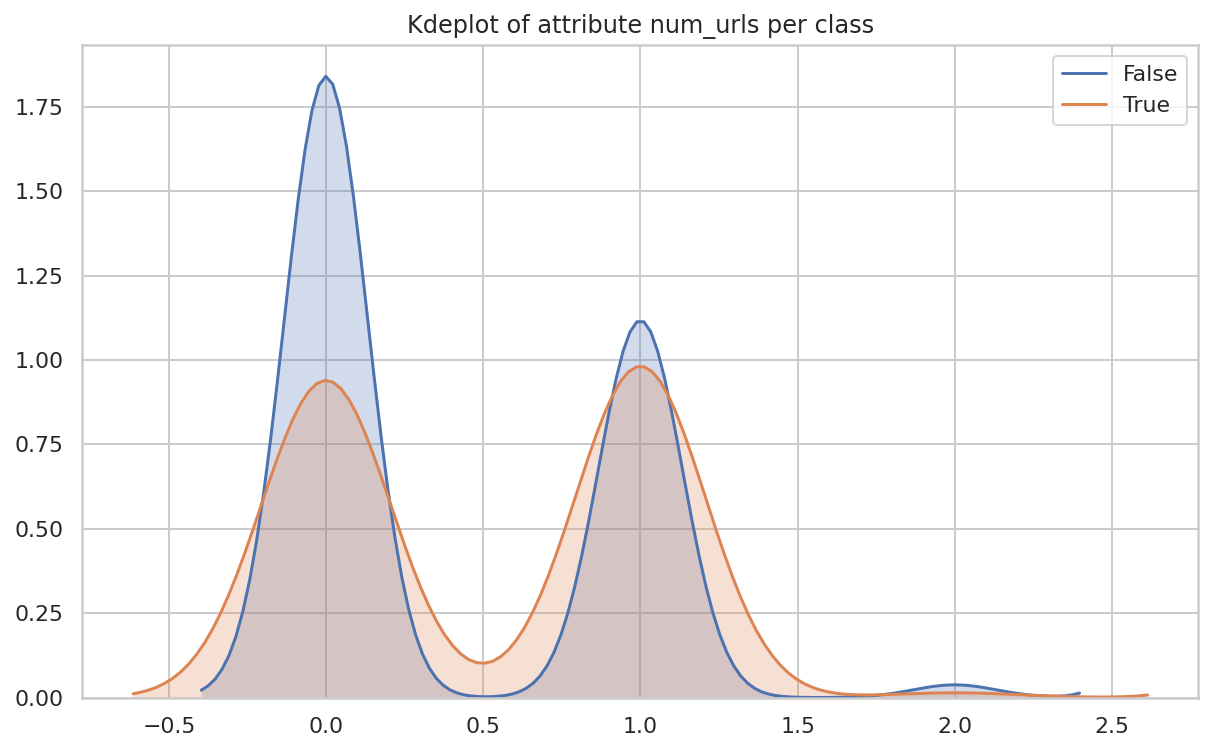



Analysis of attribute "num_media"


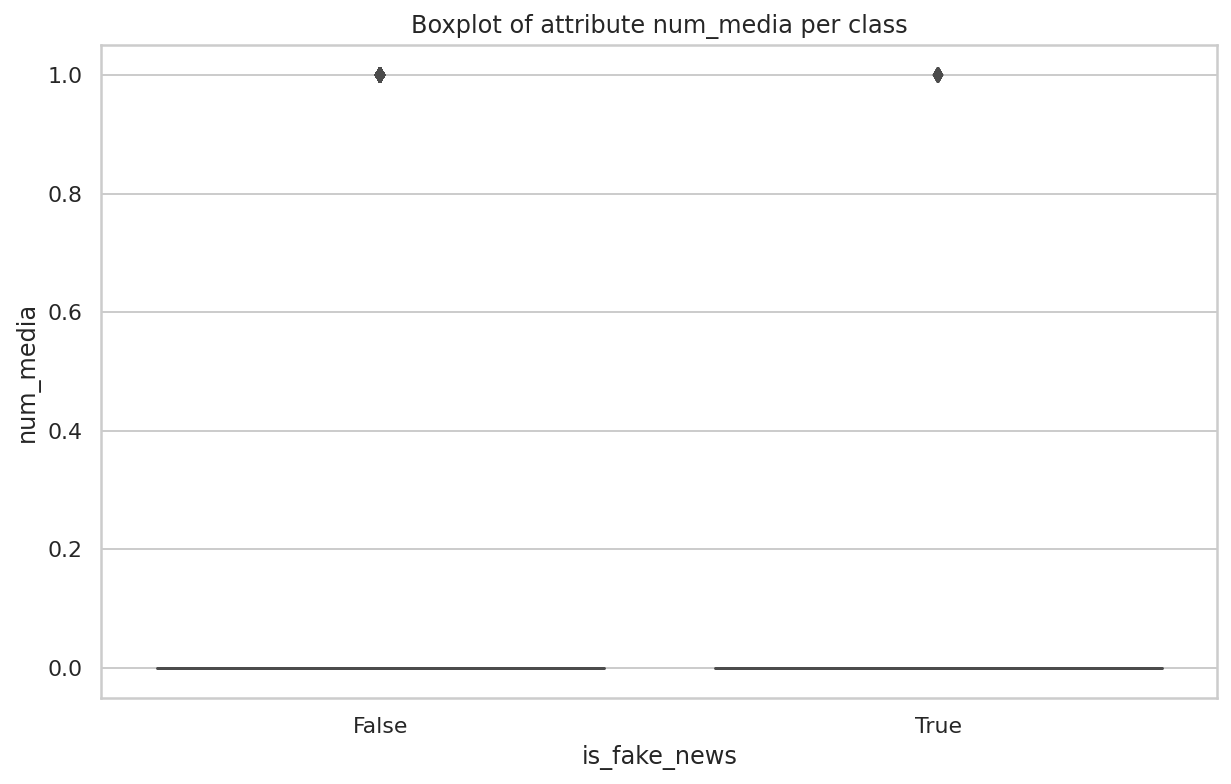

In [16]:
analyse_numerical_attributes(df, label_column, numerical_attributes)

### Categorical attributes

Analysis of categorical attributes:



Analysis of attribute "user_verified"


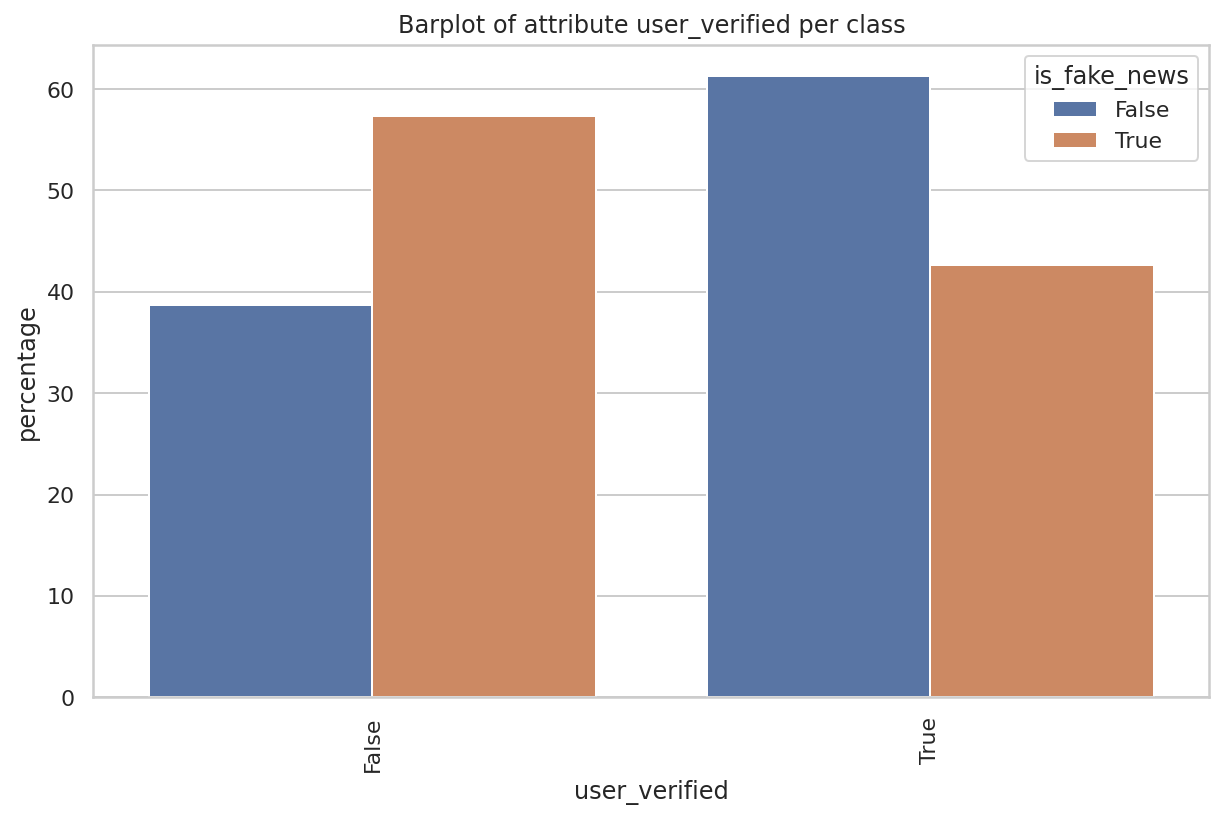



Analysis of attribute "fake_news_category"


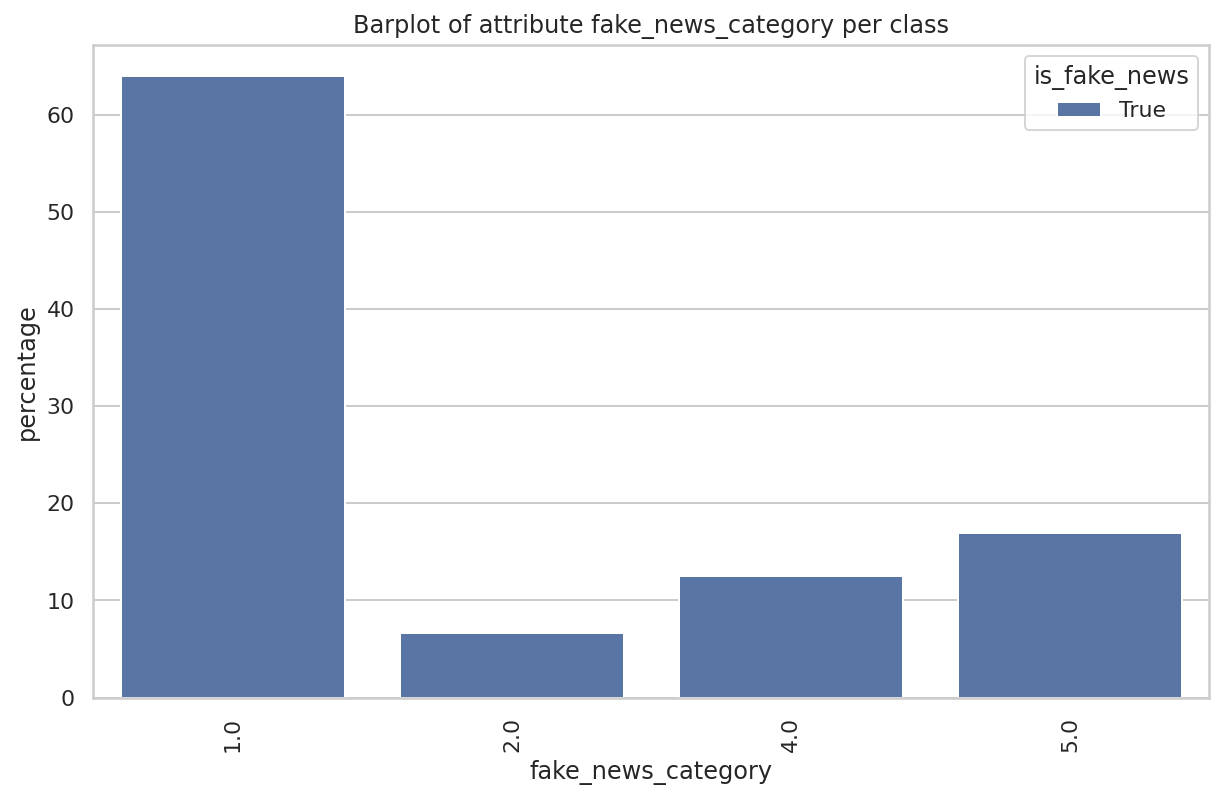

In [17]:
analyse_categorical_attributes(df, label_column, categorical_attributes)

### Textual attributes

Some parts of analysis include preprocessing text. In this case, the following operations are performed:
* removing special characters (only letters are preserved),
* removing tokens shorter than 3 characters,
* removing tokens that are in english stop-words defined by NLTK library,
* removing accent marks from tokens.

Analysis of textual attributes:



Analysis of attribute "text"


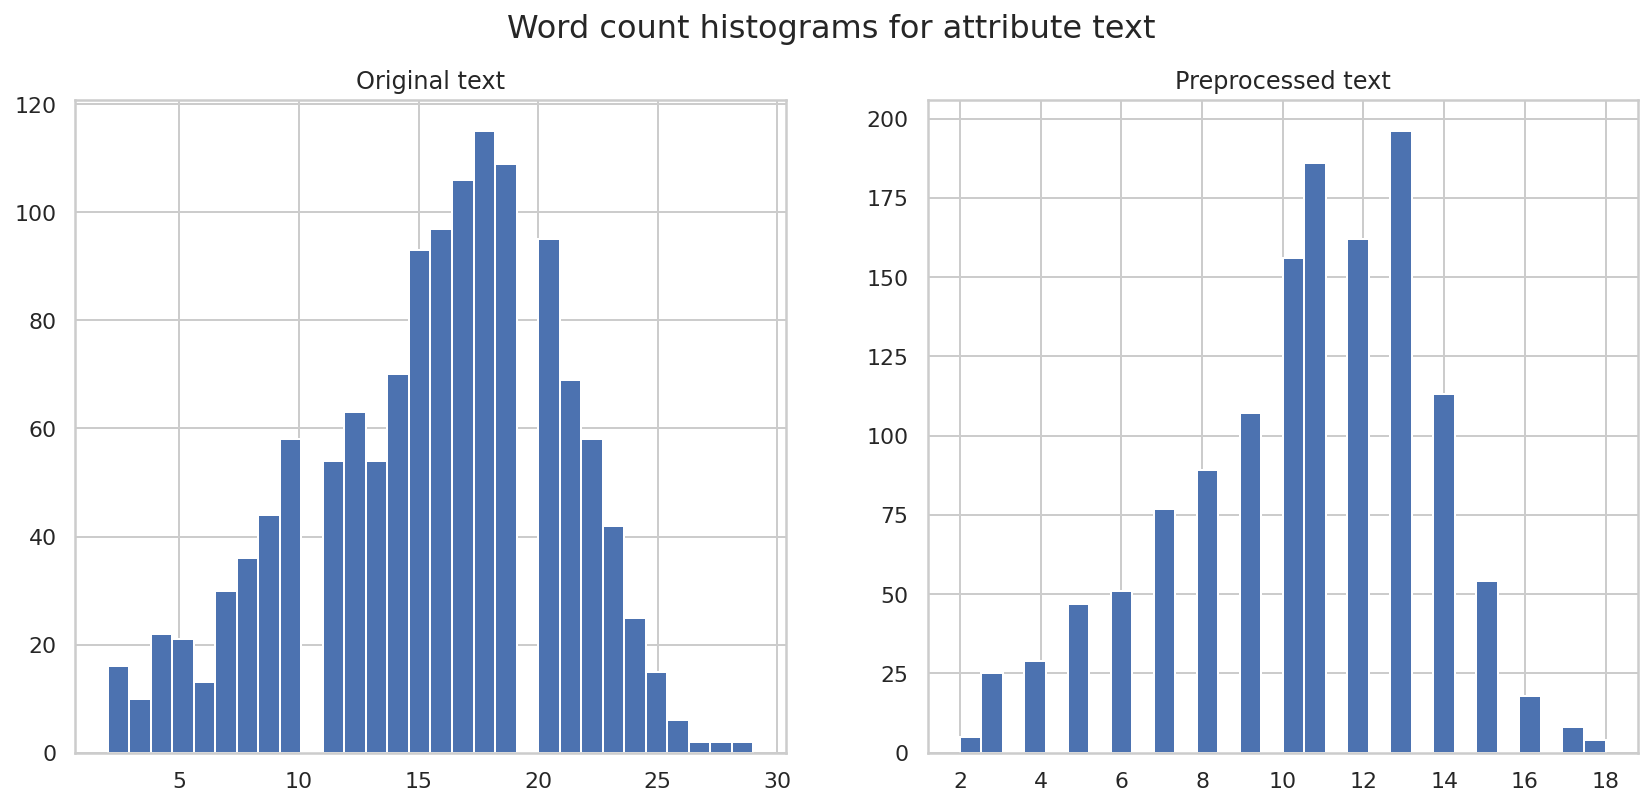

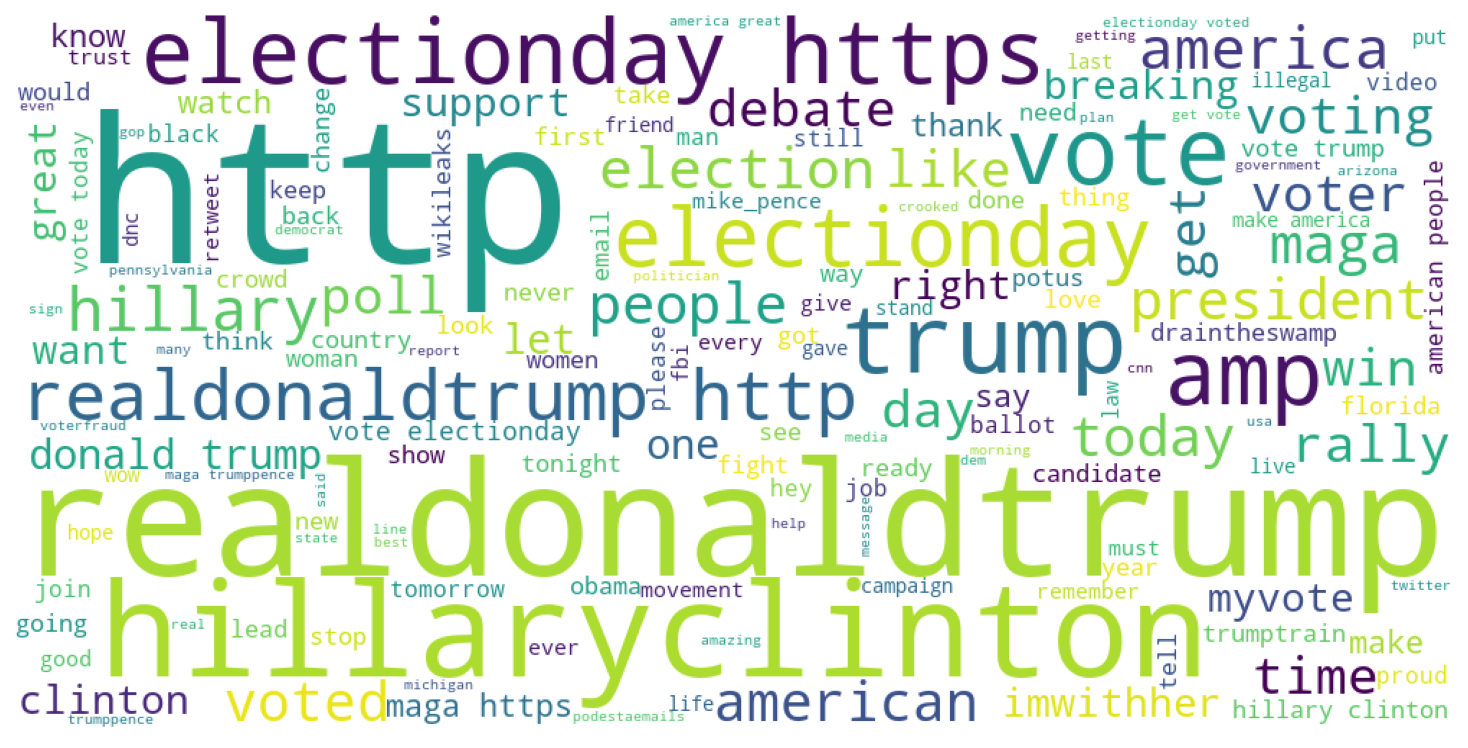



Analysis of attribute "user_screen_name"


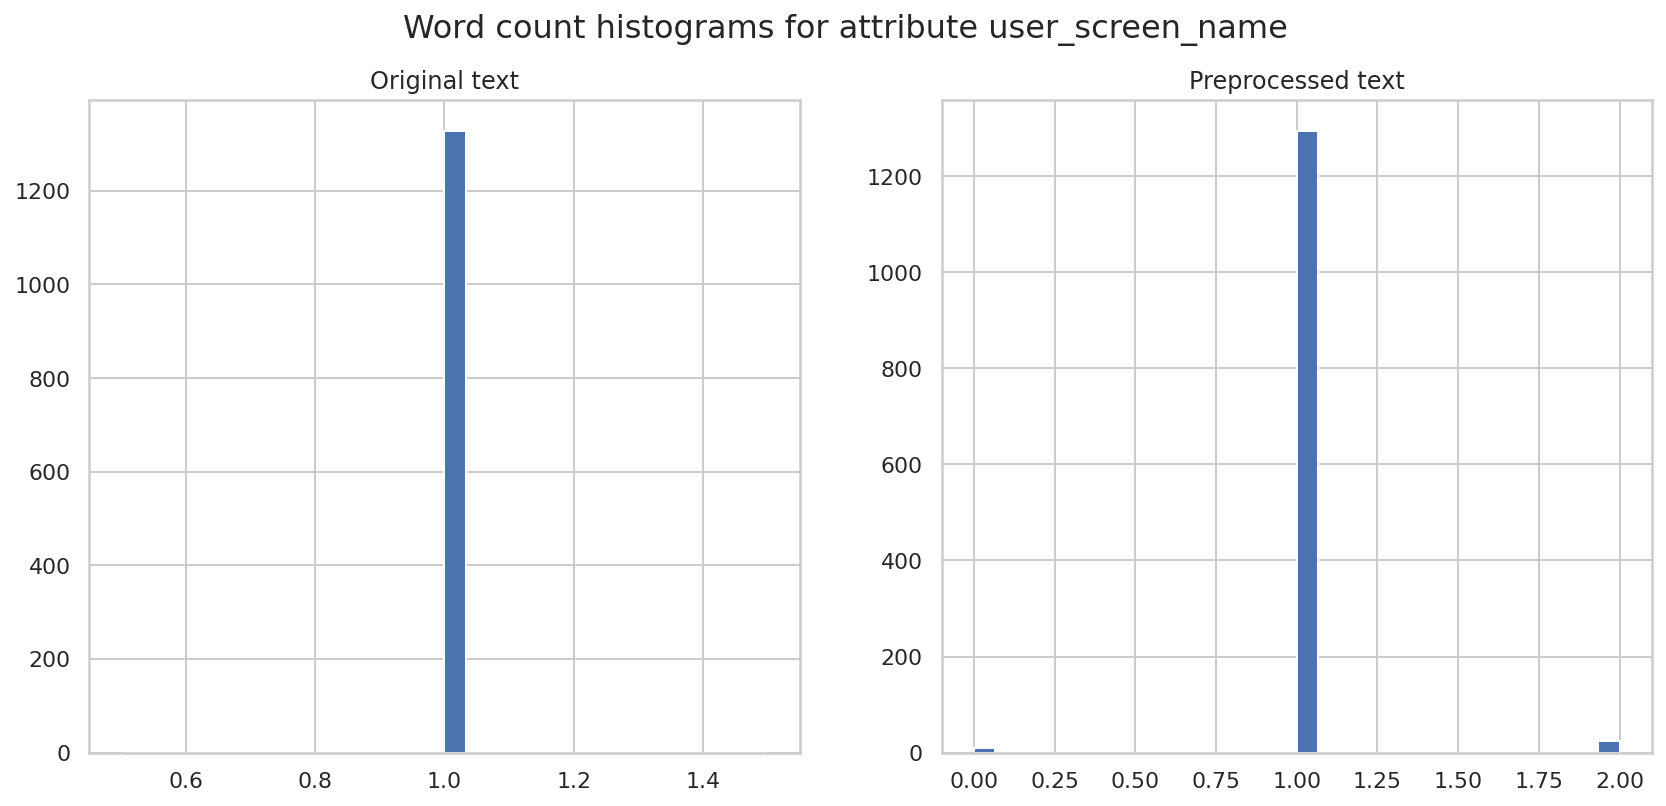

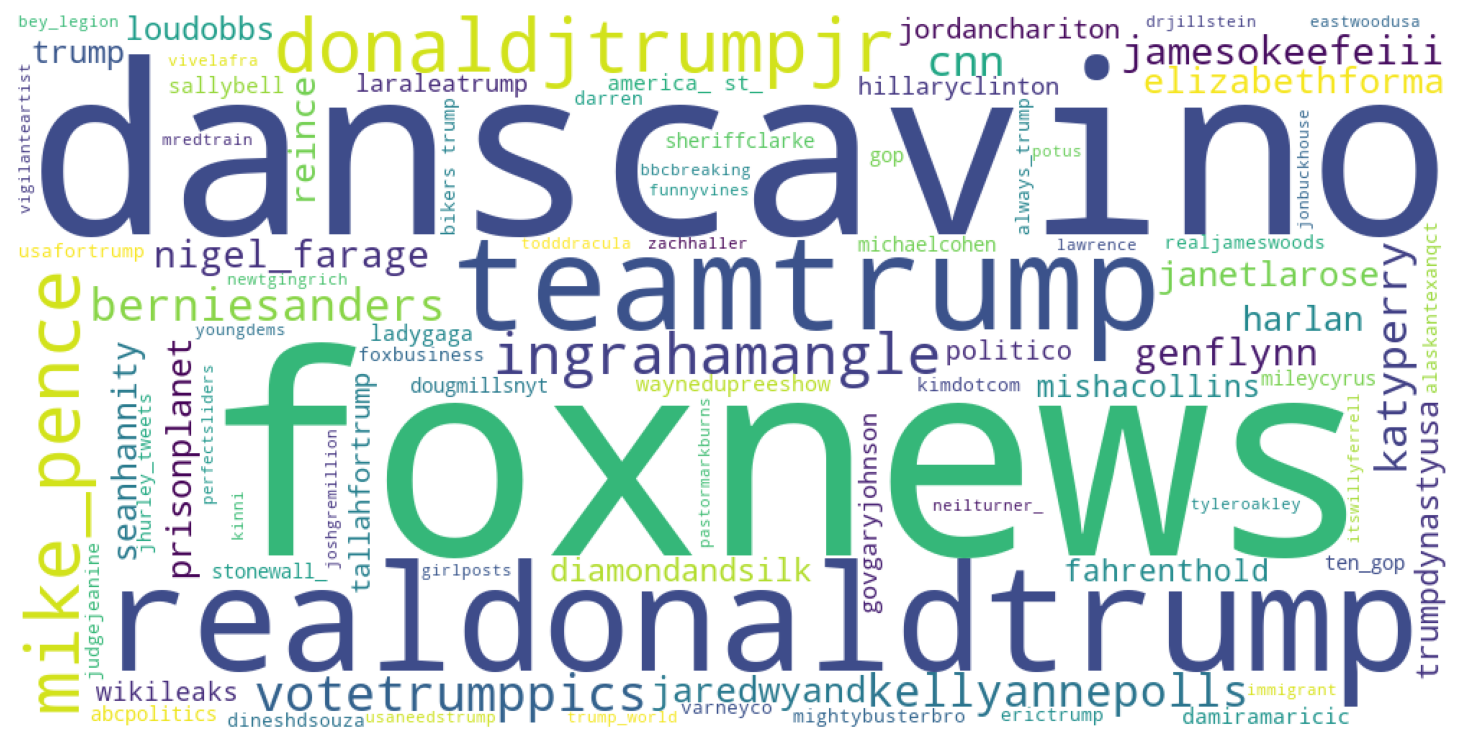



Analysis of attribute "tweet_source"


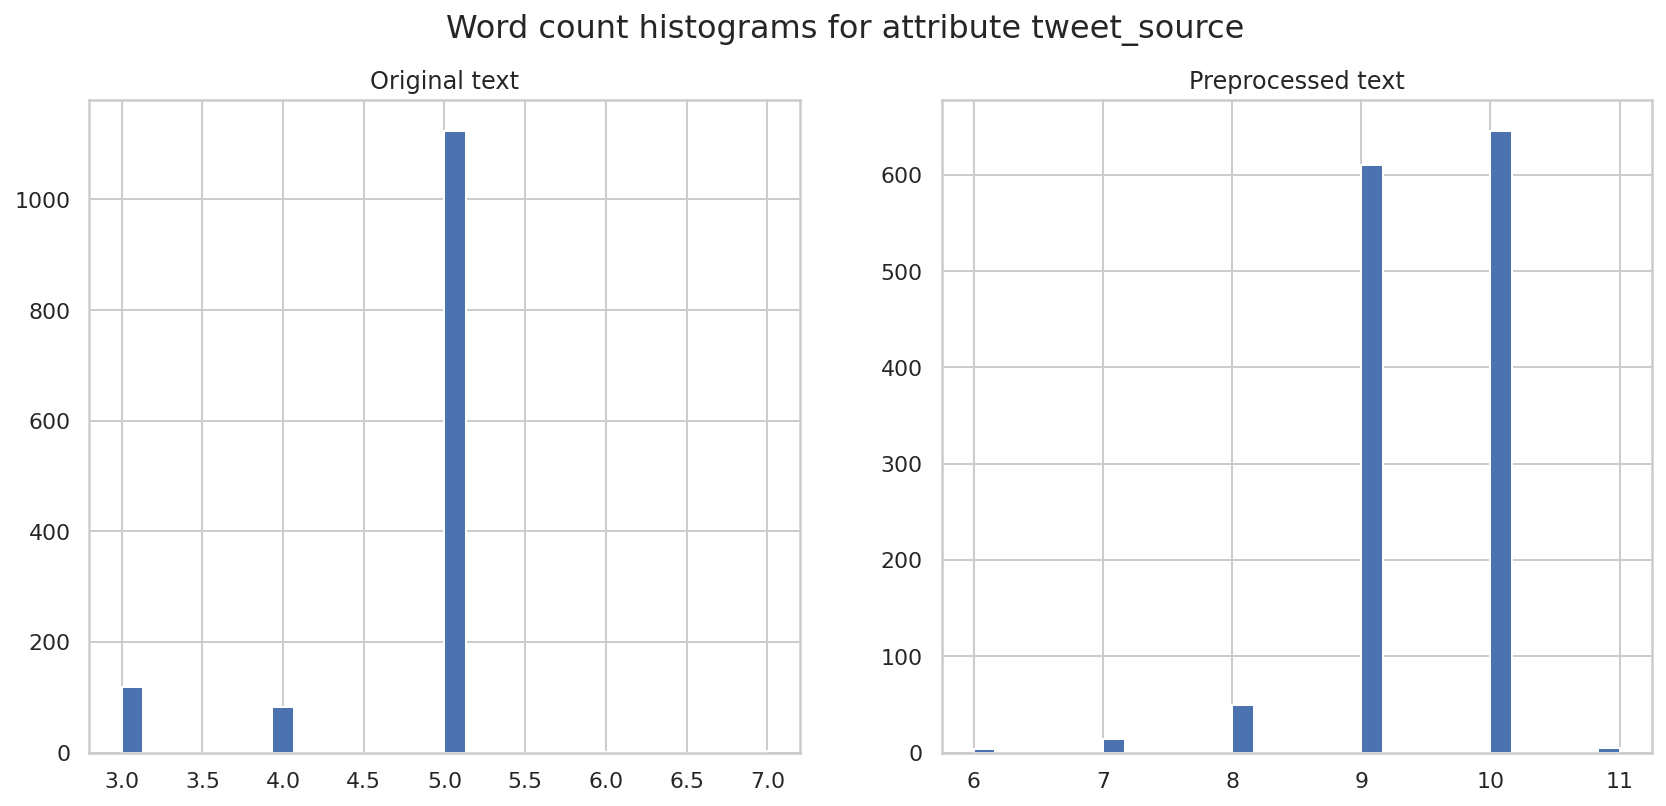

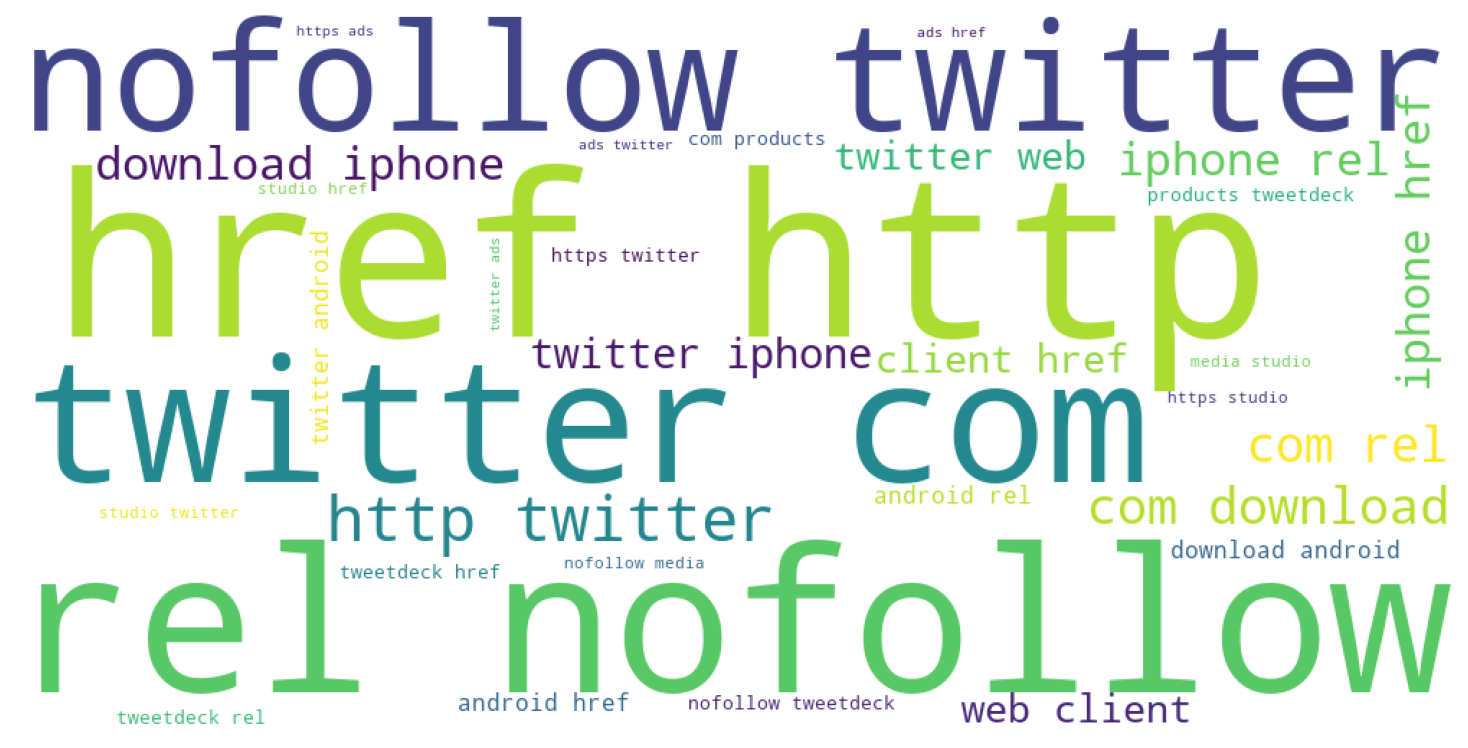

In [18]:
analyse_textual_attributes(df, textual_attributes)

## Pairwise analysis

Pairwise analysis of attributes (numerical attributes):

### Pair analysis

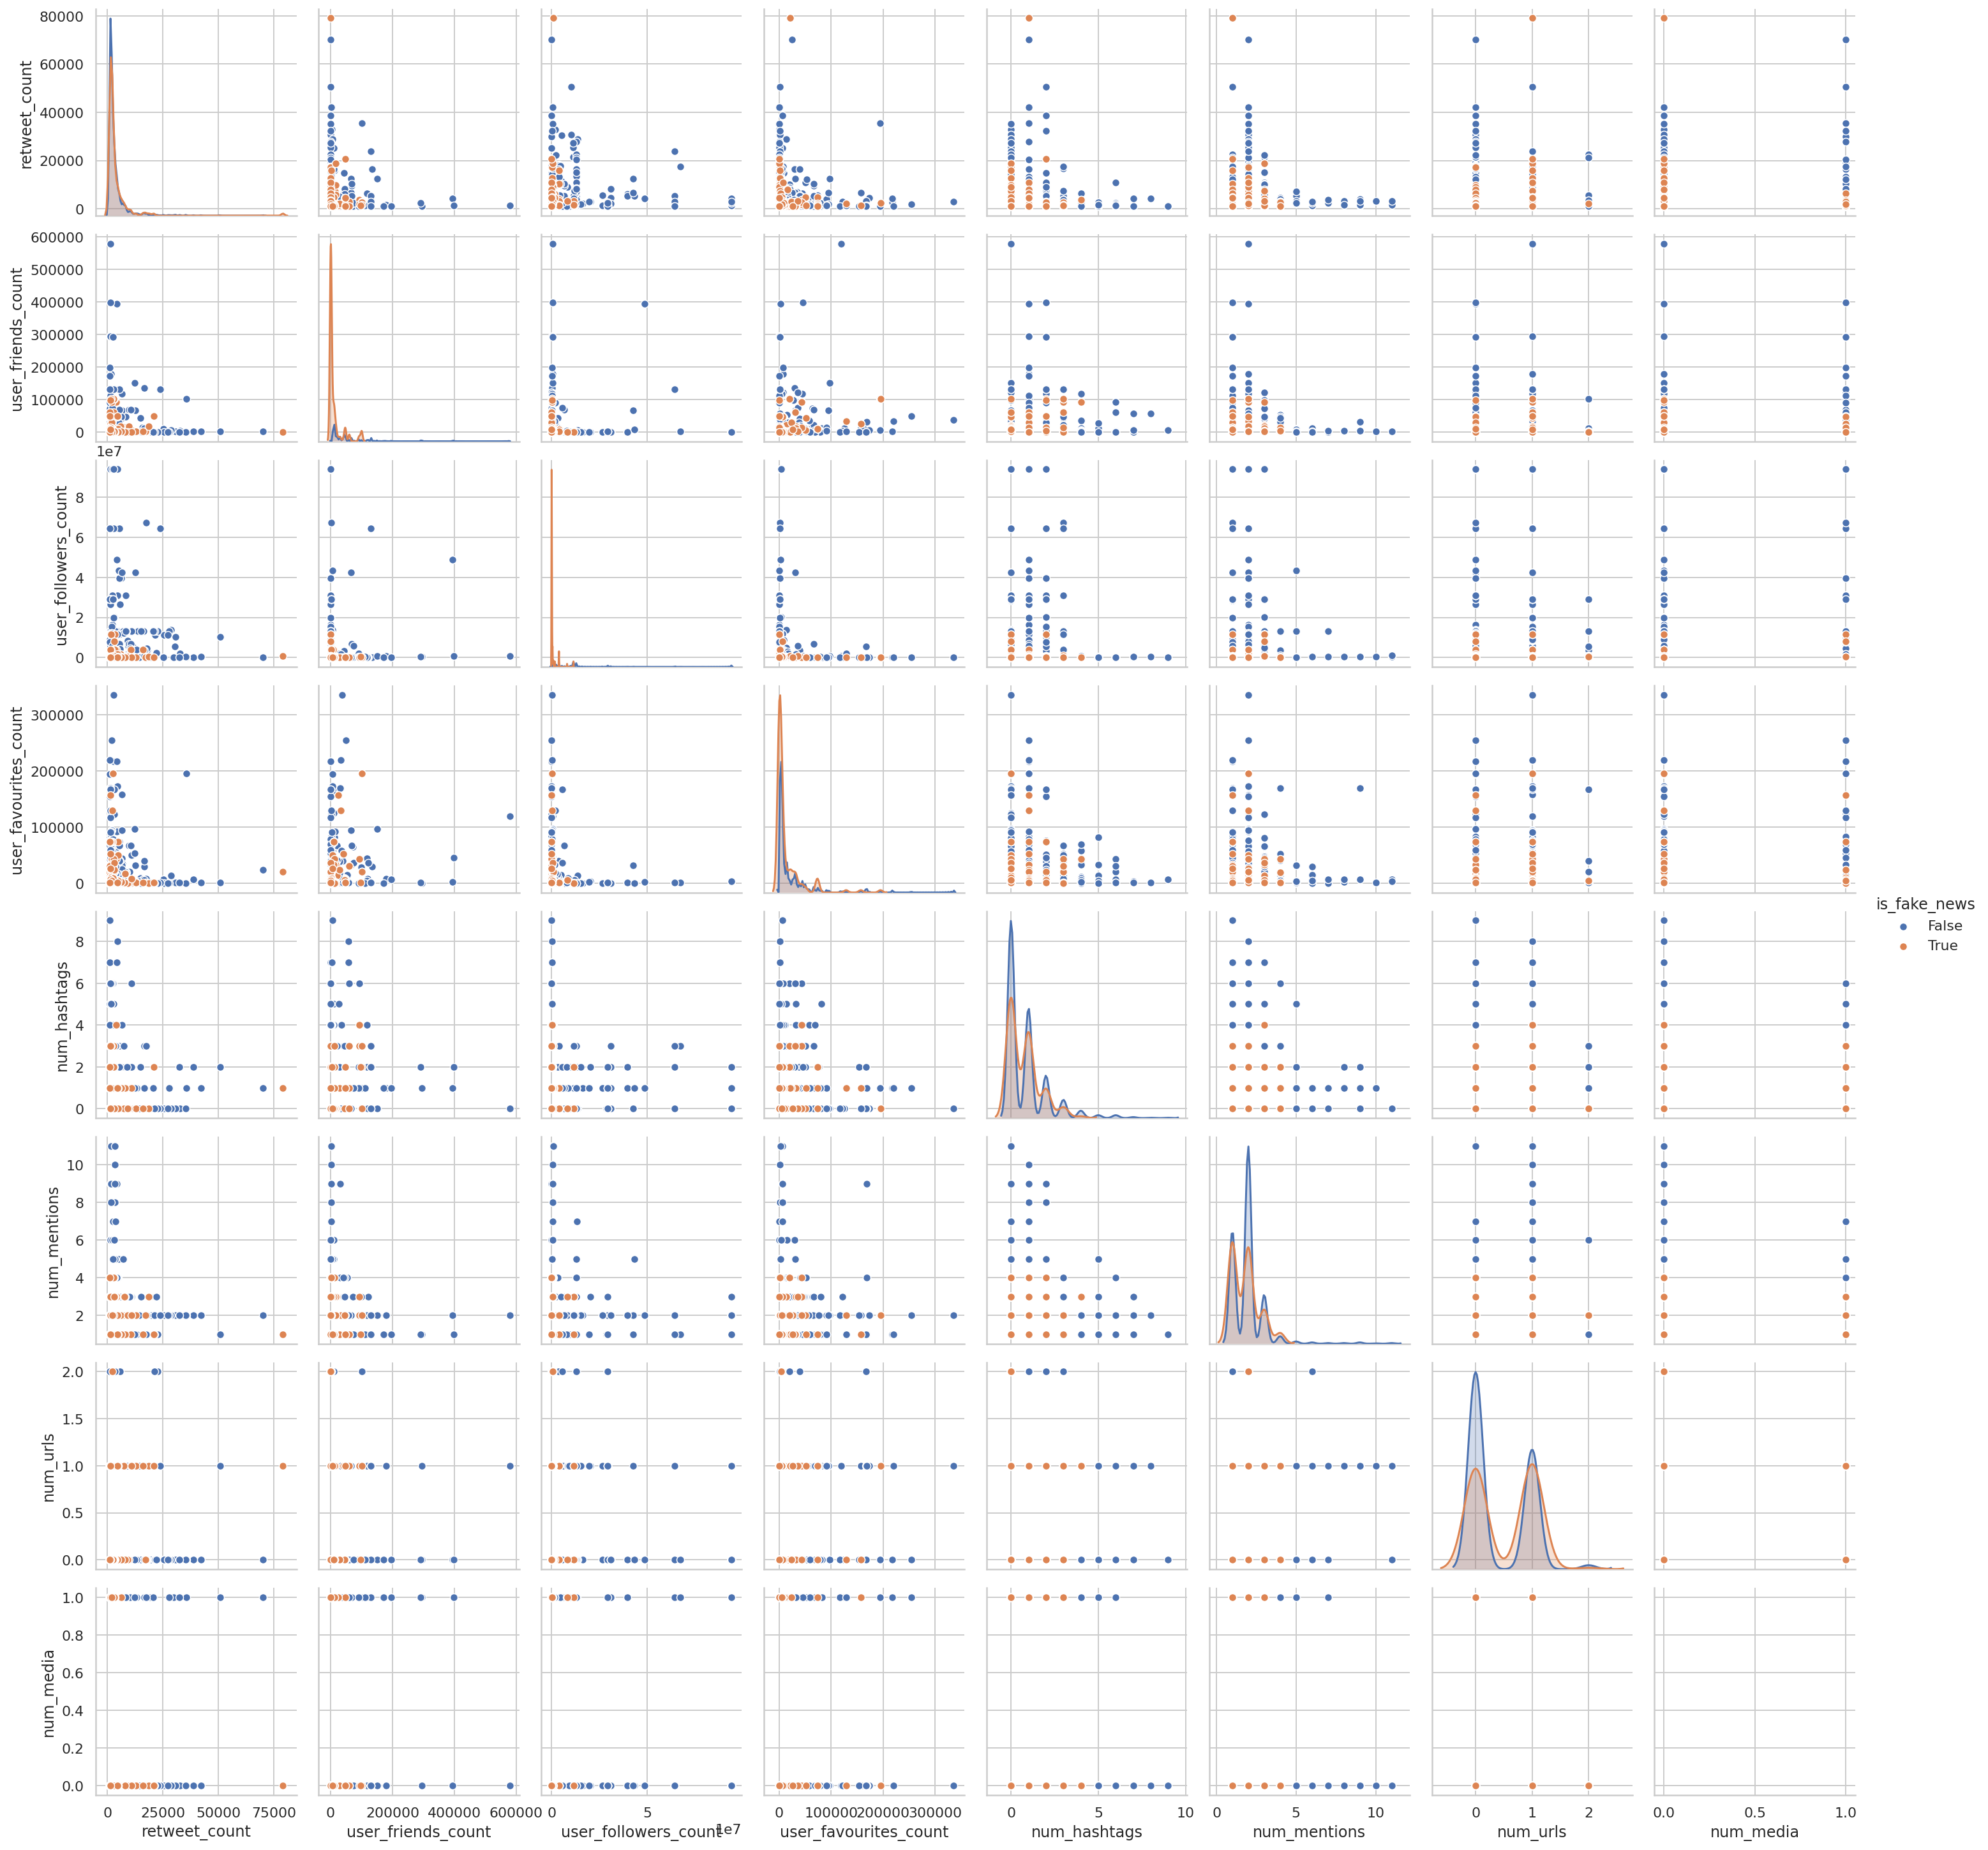

In [19]:
if numerical_attributes and len(numerical_attributes) > 1:
    sns.pairplot(df, vars=numerical_attributes, hue=label_column);

### Correlations

Correlation matrix:

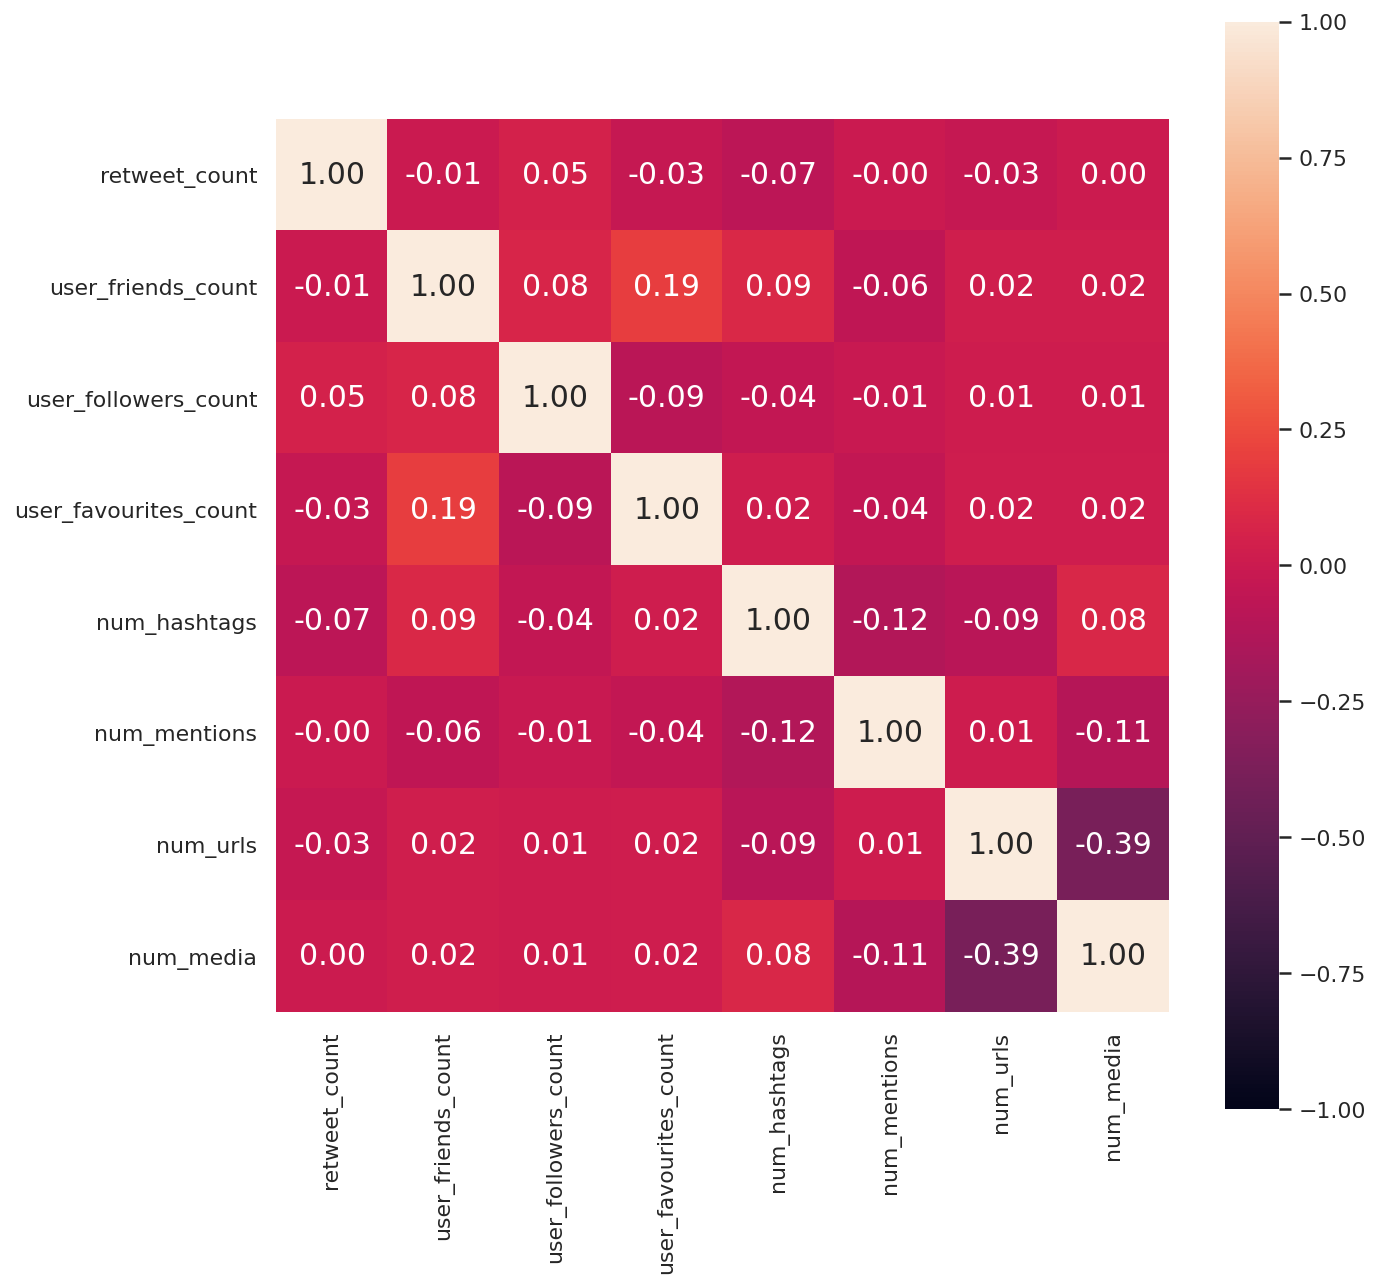

In [20]:
if numerical_attributes and len(numerical_attributes) > 1:
    check_correlations(df, numerical_attributes)